Install Necessary Libraries

In [ ]:
!pip install padelpy rdkit pandas


# Download and unzip fingerprint XML files
!wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
!unzip fingerprints_xml.zip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 14.6 MB/s eta 0:00:00
Mounted at /content/drive
--2024-06-20 01:50:41--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2024-06-20 01:50:41--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zi

Prepare the Data

In [ ]:
import pandas as pd

# Load data
data = pd.read_csv("B3DB_classification (3).tsv", sep="\t")
data['BBB+/BBB-'] = data['BBB+/BBB-'].map({'BBB+': 1, 'BBB-': 0})

# Save SMILES and labels to a file
df = pd.concat([data['SMILES'], data['BBB+/BBB-']], axis=1)
df.to_csv('molecule.smi', sep='\t', index=False, header=False)


Set Up Fingerprint XML Files

In [ ]:
import glob
from padelpy import padeldescriptor
import os

# Set up fingerprint XML files for PaDEL-Descriptor
xml_files = glob.glob("*.xml")
xml_files.sort()

Generate Fingerprints Using PaDEL-Descriptor

In [ ]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [ ]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

MACC

In [ ]:
from padelpy import padeldescriptor

fingerprint = 'MACCS'

fingerprint_output_file = ''.join([fingerprint,'.csv'])
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file,
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
MACC = pd.read_csv(fingerprint_output_file)
MACC

,Name,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,...,MACCSFP157,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
7803,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7804,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7805,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


PubChem

In [ ]:

fingerprint = 'PubChem'

fingerprint_output_file = ''.join([fingerprint,'.csv'])
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file,
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
PubChem = pd.read_csv(fingerprint_output_file)
PubChem

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7803,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7804,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7805,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


KlekotaRoth

In [ ]:
fingerprint = 'KlekotaRoth'

fingerprint_output_file = ''.join([fingerprint,'.csv'])
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file,
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
KlekotaRoth = pd.read_csv(fingerprint_output_file)
KlekotaRoth

,Name,KRFP1,KRFP2,KRFP3,KRFP4,KRFP5,KRFP6,KRFP7,KRFP8,KRFP9,...,KRFP4851,KRFP4852,KRFP4853,KRFP4854,KRFP4855,KRFP4856,KRFP4857,KRFP4858,KRFP4859,KRFP4860
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7803,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7804,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7805,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


AtomPairs2D

In [ ]:
fingerprint = 'AtomPairs2D'

fingerprint_output_file = ''.join([fingerprint,'.csv'])
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file,
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
AtomPairs2D = pd.read_csv(fingerprint_output_file)
AtomPairs2D

,Name,AD2D1,AD2D2,AD2D3,AD2D4,AD2D5,AD2D6,AD2D7,AD2D8,AD2D9,...,AD2D771,AD2D772,AD2D773,AD2D774,AD2D775,AD2D776,AD2D777,AD2D778,AD2D779,AD2D780
0,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7803,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7804,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7805,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


EState

In [ ]:
fingerprint = 'EState'

fingerprint_output_file = ''.join([fingerprint,'.csv'])
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file,
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
EState = pd.read_csv(fingerprint_output_file)
EState

,Name,EStateFP1,EStateFP2,EStateFP3,EStateFP4,EStateFP5,EStateFP6,EStateFP7,EStateFP8,EStateFP9,...,EStateFP70,EStateFP71,EStateFP72,EStateFP73,EStateFP74,EStateFP75,EStateFP76,EStateFP77,EStateFP78,EStateFP79
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7803,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7804,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7805,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


CDKextended

In [ ]:
fingerprint = 'CDKextended'

fingerprint_output_file = ''.join([fingerprint,'.csv'])
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file,
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
CDKextended = pd.read_csv(fingerprint_output_file)
CDKextended

,Name,ExtFP1,ExtFP2,ExtFP3,ExtFP4,ExtFP5,ExtFP6,ExtFP7,ExtFP8,ExtFP9,...,ExtFP1015,ExtFP1016,ExtFP1017,ExtFP1018,ExtFP1019,ExtFP1020,ExtFP1021,ExtFP1022,ExtFP1023,ExtFP1024
0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,1,...,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7803,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
7804,1,0,0,0,1,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
7805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


CDK

In [ ]:
fingerprint = 'CDK'

fingerprint_output_file = ''.join([fingerprint,'.csv'])
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file,
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
CDK = pd.read_csv(fingerprint_output_file)
CDK

,Name,FP1,FP2,FP3,FP4,FP5,FP6,FP7,FP8,FP9,...,FP1015,FP1016,FP1017,FP1018,FP1019,FP1020,FP1021,FP1022,FP1023,FP1024
0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,1,1,1,1,0,...,1,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,1,1,0,0,...,1,1,0,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
7803,1,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7804,1,0,1,0,1,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0
7805,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


CDKgraphonly

In [ ]:
fingerprint = 'CDKgraphonly'

fingerprint_output_file = ''.join([fingerprint,'.csv'])
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file,
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
CDKgraphonly = pd.read_csv(fingerprint_output_file)
CDKgraphonly

,Name,GraphFP1,GraphFP2,GraphFP3,GraphFP4,GraphFP5,GraphFP6,GraphFP7,GraphFP8,GraphFP9,...,GraphFP1015,GraphFP1016,GraphFP1017,GraphFP1018,GraphFP1019,GraphFP1020,GraphFP1021,GraphFP1022,GraphFP1023,GraphFP1024
0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7803,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7804,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Substructure

In [ ]:
from padelpy import padeldescriptor

fingerprint = 'Substructure'

fingerprint_output_file = ''.join([fingerprint,'.csv'])
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi',
                d_file=fingerprint_output_file,
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
Substructure = pd.read_csv(fingerprint_output_file)
Substructure

,Name,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,...,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7802,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7803,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7804,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7805,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


FEATURE SELECTION

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv("descriptors(KlekotaRoth).csv")

# Separate features and target variable
X = df.drop('Name', axis=1)
y = df['Name']

# Create a pipeline with an imputer and the RandomForestClassifier
pipeline = make_pipeline(SimpleImputer(strategy='mean'), RandomForestClassifier(random_state=42))

# Fit the pipeline
pipeline.fit(X, y)

# Get feature importances
feature_importances = pipeline.named_steps['randomforestclassifier'].feature_importances_

# Create a dictionary to store feature importances
feature_importance_scores = {}
for i, score in enumerate(feature_importances):
    feature_importance_scores[X.columns[i]] = score

# Sort features based on importance ranks
sorted_features = sorted(feature_importance_scores.items(), key=lambda x: x[1], reverse=True)

# Filter out features with importance scores equal to 0
nonzero_features = {feature: score for feature, score in sorted_features if score != 0}

# Reorder columns based on importance ranks
X_sorted_nonzero = X[list(nonzero_features.keys())]

# Print feature ranks
print("Ranks (Feature Importances):")
for rank, (feature_name, score) in enumerate(sorted_features, start=1):
    print(f"Rank {rank}: '{feature_name}' - Importance: {score}")

print(X_sorted_nonzero)

# Recursive feature elimination
# Initialize variables
columns_to_remove = 5
best_f1_score = 0
best_subset = None

# Initialize X1 and y1 with the non-zero sorted DataFrame
X1 = X_sorted_nonzero
y1 = y

# Compute full cross-validation F1 score
f1_score = np.mean(cross_val_score(pipeline, X1, y1, cv=5, scoring='f1'))
print("Full cross-validation F1 score:", f1_score)

# Sequential feature elimination based on F1 score
while X1.shape[1] > columns_to_remove:
    # Create subset of features by removing columns
    X_subset = X1.iloc[:, :-columns_to_remove]

    # Compute cross-validation F1 score for the subset
    subset_f1_score = np.mean(cross_val_score(pipeline, X_subset, y1, cv=5, scoring='f1'))

    print(f"Number of columns: {X_subset.shape[1]}, Cross-validation F1 score: {subset_f1_score}")

    # Update best F1 score and best subset if current subset has higher F1 score
    if subset_f1_score > best_f1_score:
        best_f1_score = subset_f1_score
        best_subset = X_subset

    # Remove columns from X1 for the next iteration
    X1 = X_subset

# Print best F1 score subset
print("\nBest F1 score subset:")
print(best_subset.head())

# Print best F1 score achieved
print("Best F1 score:", best_f1_score)


Streaming output truncated to the last 5000 lines.
Rank 353: 'KRFP1153' - Importance: 0.0007690592800224825
Rank 354: 'KRFP2564' - Importance: 0.000766968201662786
Rank 355: 'KRFP1405' - Importance: 0.000761751888658421
Rank 356: 'KRFP3143' - Importance: 0.0007586780571262544
Rank 357: 'KRFP648' - Importance: 0.0007581272450679973
Rank 358: 'KRFP347' - Importance: 0.0007567816668085103
Rank 359: 'KRFP3169' - Importance: 0.0007556193110696896
Rank 360: 'KRFP3707' - Importance: 0.0007490133557281544
Rank 361: 'KRFP3225' - Importance: 0.0007419350893353175
Rank 362: 'KRFP4591' - Importance: 0.0007397817916521684
Rank 363: 'KRFP3426' - Importance: 0.0007391251748016536
Rank 364: 'KRFP3180' - Importance: 0.0007388801578472575
Rank 365: 'KRFP4117' - Importance: 0.0007336188901284927
Rank 366: 'KRFP1139' - Importance: 0.0007329015623702869
Rank 367: 'KRFP2977' - Importance: 0.0007311405570626438
Rank 368: 'KRFP3398' - Importance: 0.0007291591745585056
Rank 369: 'KRFP2886' - Importance: 0.0007

In [ ]:
# Save the best F1 score DataFrame to a CSV file
output_path = '(KlekotaRoth)best_f1_dataframe.csv'
best_subset.to_csv(output_path, index=False)

PubChem

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv("descriptors(PubChem).csv")

# Separate features and target variable
X = df.drop('Name', axis=1)
y = df['Name']

# Create a pipeline with an imputer and the RandomForestClassifier
pipeline = make_pipeline(SimpleImputer(strategy='mean'), RandomForestClassifier(random_state=42))

# Fit the pipeline
pipeline.fit(X, y)

# Get feature importances
feature_importances = pipeline.named_steps['randomforestclassifier'].feature_importances_

# Create a dictionary to store feature importances
feature_importance_scores = {}
for i, score in enumerate(feature_importances):
    feature_importance_scores[X.columns[i]] = score

# Sort features based on importance ranks
sorted_features = sorted(feature_importance_scores.items(), key=lambda x: x[1], reverse=True)

# Filter out features with importance scores equal to 0
nonzero_features = {feature: score for feature, score in sorted_features if score != 0}

# Reorder columns based on importance ranks
X_sorted_nonzero = X[list(nonzero_features.keys())]

# Print feature ranks
print("Ranks (Feature Importances):")
for rank, (feature_name, score) in enumerate(sorted_features, start=1):
    print(f"Rank {rank}: '{feature_name}' - Importance: {score}")

print(X_sorted_nonzero)

# Recursive feature elimination
# Initialize variables
columns_to_remove = 5
best_f1_score = 0
best_subset = None

# Initialize X1 and y1 with the non-zero sorted DataFrame
X1 = X_sorted_nonzero
y1 = y

# Compute full cross-validation F1 score
f1_score = np.mean(cross_val_score(pipeline, X1, y1, cv=5, scoring='f1'))
print("Full cross-validation F1 score:", f1_score)

# Sequential feature elimination based on F1 score
while X1.shape[1] > columns_to_remove:
    # Create subset of features by removing columns
    X_subset = X1.iloc[:, :-columns_to_remove]

    # Compute cross-validation F1 score for the subset
    subset_f1_score = np.mean(cross_val_score(pipeline, X_subset, y1, cv=5, scoring='f1'))

    print(f"Number of columns: {X_subset.shape[1]}, Cross-validation F1 score: {subset_f1_score}")

    # Update best F1 score and best subset if current subset has higher F1 score
    if subset_f1_score > best_f1_score:
        best_f1_score = subset_f1_score
        best_subset = X_subset

    # Remove columns from X1 for the next iteration
    X1 = X_subset

# Print best F1 score subset
print("\nBest F1 score subset:")
print(best_subset.head())

# Print best F1 score achieved
print("Best F1 score:", best_f1_score)


Ranks (Feature Importances):
Rank 1: 'PubchemFP20' - Importance: 0.02585475419523047
Rank 2: 'PubchemFP566' - Importance: 0.017604092564266798
Rank 3: 'PubchemFP380' - Importance: 0.01605679710476825
Rank 4: 'PubchemFP131' - Importance: 0.01416734769674853
Rank 5: 'PubchemFP659' - Importance: 0.013374834095702672
Rank 6: 'PubchemFP308' - Importance: 0.012718856112040908
Rank 7: 'PubchemFP602' - Importance: 0.011864851099930834
Rank 8: 'PubchemFP406' - Importance: 0.011305093628395366
Rank 9: 'PubchemFP440' - Importance: 0.01080675009715128
Rank 10: 'PubchemFP132' - Importance: 0.010526288733499542
Rank 11: 'PubchemFP13' - Importance: 0.010065490954317585
Rank 12: 'PubchemFP21' - Importance: 0.009189615542534212
Rank 13: 'PubchemFP580' - Importance: 0.008702158617047316
Rank 14: 'PubchemFP129' - Importance: 0.008587100291035994
Rank 15: 'PubchemFP393' - Importance: 0.008528266774932833
Rank 16: 'PubchemFP349' - Importance: 0.008048739190159393
Rank 17: 'PubchemFP338' - Importance: 0.008

In [ ]:
# Save the best F1 score DataFrame to a CSV file
output_path = '(PubChem)best_f1_dataframe.csv'
best_subset.to_csv(output_path, index=False)

MACC

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv("descriptors(MACC).csv")

# Separate features and target variable
X = df.drop('Name', axis=1)
y = df['Name']

# Create a pipeline with an imputer and the RandomForestClassifier
pipeline = make_pipeline(SimpleImputer(strategy='mean'), RandomForestClassifier(random_state=42))

# Fit the pipeline
pipeline.fit(X, y)

# Get feature importances
feature_importances = pipeline.named_steps['randomforestclassifier'].feature_importances_

# Create a dictionary to store feature importances
feature_importance_scores = {}
for i, score in enumerate(feature_importances):
    feature_importance_scores[X.columns[i]] = score

# Sort features based on importance ranks
sorted_features = sorted(feature_importance_scores.items(), key=lambda x: x[1], reverse=True)

# Filter out features with importance scores equal to 0
nonzero_features = {feature: score for feature, score in sorted_features if score != 0}

# Reorder columns based on importance ranks
X_sorted_nonzero = X[list(nonzero_features.keys())]

# Print feature ranks
print("Ranks (Feature Importances):")
for rank, (feature_name, score) in enumerate(sorted_features, start=1):
    print(f"Rank {rank}: '{feature_name}' - Importance: {score}")

print(X_sorted_nonzero)

# Recursive feature elimination
# Initialize variables
columns_to_remove = 5
best_f1_score = 0
best_subset = None

# Initialize X1 and y1 with the non-zero sorted DataFrame
X1 = X_sorted_nonzero
y1 = y

# Compute full cross-validation F1 score
f1_score = np.mean(cross_val_score(pipeline, X1, y1, cv=5, scoring='f1'))
print("Full cross-validation F1 score:", f1_score)

# Sequential feature elimination based on F1 score
while X1.shape[1] > columns_to_remove:
    # Create subset of features by removing columns
    X_subset = X1.iloc[:, :-columns_to_remove]

    # Compute cross-validation F1 score for the subset
    subset_f1_score = np.mean(cross_val_score(pipeline, X_subset, y1, cv=5, scoring='f1'))

    print(f"Number of columns: {X_subset.shape[1]}, Cross-validation F1 score: {subset_f1_score}")

    # Update best F1 score and best subset if current subset has higher F1 score
    if subset_f1_score > best_f1_score:
        best_f1_score = subset_f1_score
        best_subset = X_subset

    # Remove columns from X1 for the next iteration
    X1 = X_subset

# Print best F1 score subset
print("\nBest F1 score subset:")
print(best_subset.head())

# Print best F1 score achieved
print("Best F1 score:", best_f1_score)


Ranks (Feature Importances):
Rank 1: 'MACCSFP95' - Importance: 0.04124590579072642
Rank 2: 'MACCSFP131' - Importance: 0.03997814001308004
Rank 3: 'MACCSFP140' - Importance: 0.031615101526951774
Rank 4: 'MACCSFP146' - Importance: 0.03033614077539027
Rank 5: 'MACCSFP97' - Importance: 0.028374917688477923
Rank 6: 'MACCSFP8' - Importance: 0.023700208897938793
Rank 7: 'MACCSFP11' - Importance: 0.023454668410217226
Rank 8: 'MACCSFP54' - Importance: 0.021004750040037927
Rank 9: 'MACCSFP139' - Importance: 0.019494721707170207
Rank 10: 'MACCSFP123' - Importance: 0.018835440629682818
Rank 11: 'MACCSFP133' - Importance: 0.018568202684114434
Rank 12: 'MACCSFP136' - Importance: 0.0158598692094913
Rank 13: 'MACCSFP151' - Importance: 0.013263948968612068
Rank 14: 'MACCSFP47' - Importance: 0.012326175971386187
Rank 15: 'MACCSFP150' - Importance: 0.011761632416608851
Rank 16: 'MACCSFP149' - Importance: 0.010493807461217964
Rank 17: 'MACCSFP141' - Importance: 0.010458223975511684
Rank 18: 'MACCSFP88' - 

In [ ]:
# Save the best F1 score DataFrame to a CSV file
output_path = '(MACC)best_f1_dataframe.csv'
best_subset.to_csv(output_path, index=False)


AtomPairs2D

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv("descriptors(AtomPairs2D).csv")

# Separate features and target variable
X = df.drop('Name', axis=1)
y = df['Name']

# Create a pipeline with an imputer and the RandomForestClassifier
pipeline = make_pipeline(SimpleImputer(strategy='mean'), RandomForestClassifier(random_state=42))

# Fit the pipeline
pipeline.fit(X, y)

# Get feature importances
feature_importances = pipeline.named_steps['randomforestclassifier'].feature_importances_

# Create a dictionary to store feature importances
feature_importance_scores = {}
for i, score in enumerate(feature_importances):
    feature_importance_scores[X.columns[i]] = score

# Sort features based on importance ranks
sorted_features = sorted(feature_importance_scores.items(), key=lambda x: x[1], reverse=True)

# Filter out features with importance scores equal to 0
nonzero_features = {feature: score for feature, score in sorted_features if score != 0}

# Reorder columns based on importance ranks
X_sorted_nonzero = X[list(nonzero_features.keys())]

# Print feature ranks
print("Ranks (Feature Importances):")
for rank, (feature_name, score) in enumerate(sorted_features, start=1):
    print(f"Rank {rank}: '{feature_name}' - Importance: {score}")

print(X_sorted_nonzero)

# Recursive feature elimination
# Initialize variables
columns_to_remove = 5
best_f1_score = 0
best_subset = None

# Initialize X1 and y1 with the non-zero sorted DataFrame
X1 = X_sorted_nonzero
y1 = y

# Compute full cross-validation F1 score
f1_score = np.mean(cross_val_score(pipeline, X1, y1, cv=5, scoring='f1'))
print("Full cross-validation F1 score:", f1_score)

# Sequential feature elimination based on F1 score
while X1.shape[1] > columns_to_remove:
    # Create subset of features by removing columns
    X_subset = X1.iloc[:, :-columns_to_remove]

    # Compute cross-validation F1 score for the subset
    subset_f1_score = np.mean(cross_val_score(pipeline, X_subset, y1, cv=5, scoring='f1'))

    print(f"Number of columns: {X_subset.shape[1]}, Cross-validation F1 score: {subset_f1_score}")

    # Update best F1 score and best subset if current subset has higher F1 score
    if subset_f1_score > best_f1_score:
        best_f1_score = subset_f1_score
        best_subset = X_subset

    # Remove columns from X1 for the next iteration
    X1 = X_subset

# Print best F1 score subset
print("\nBest F1 score subset:")
print(best_subset.head())

# Print best F1 score achieved
print("Best F1 score:", best_f1_score)


Ranks (Feature Importances):
Rank 1: 'AD2D570' - Importance: 0.04667046845319269
Rank 2: 'AD2D170' - Importance: 0.03220867431258394
Rank 3: 'AD2D336' - Importance: 0.029399847990296338
Rank 4: 'AD2D560' - Importance: 0.02758105040616419
Rank 5: 'AD2D638' - Importance: 0.02745566429013321
Rank 6: 'AD2D102' - Importance: 0.026334952074947373
Rank 7: 'AD2D716' - Importance: 0.02493086006968456
Rank 8: 'AD2D648' - Importance: 0.02255657344145019
Rank 9: 'AD2D258' - Importance: 0.020908854554740345
Rank 10: 'AD2D414' - Importance: 0.02048199918875192
Rank 11: 'AD2D492' - Importance: 0.019968718368509508
Rank 12: 'AD2D404' - Importance: 0.019894261491303883
Rank 13: 'AD2D704' - Importance: 0.018509775672727078
Rank 14: 'AD2D93' - Importance: 0.01805577303738104
Rank 15: 'AD2D248' - Importance: 0.017805754106499937
Rank 16: 'AD2D403' - Importance: 0.01714055371120854
Rank 17: 'AD2D326' - Importance: 0.01673597519122182
Rank 18: 'AD2D726' - Importance: 0.016646237963758272
Rank 19: 'AD2D705' 

In [ ]:
# Save the best F1 score DataFrame to a CSV file
output_path = '(AtomPairs2D)best_f1_dataframe.csv'
best_subset.to_csv(output_path, index=False)

EState

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv("/descriptors(EState).csv")

# Separate features and target variable
X = df.drop('Name', axis=1)
y = df['Name']

# Create a pipeline with an imputer and the RandomForestClassifier
pipeline = make_pipeline(SimpleImputer(strategy='mean'), RandomForestClassifier(random_state=42))

# Fit the pipeline
pipeline.fit(X, y)

# Get feature importances
feature_importances = pipeline.named_steps['randomforestclassifier'].feature_importances_

# Create a dictionary to store feature importances
feature_importance_scores = {}
for i, score in enumerate(feature_importances):
    feature_importance_scores[X.columns[i]] = score

# Sort features based on importance ranks
sorted_features = sorted(feature_importance_scores.items(), key=lambda x: x[1], reverse=True)

# Filter out features with importance scores equal to 0
nonzero_features = {feature: score for feature, score in sorted_features if score != 0}

# Reorder columns based on importance ranks
X_sorted_nonzero = X[list(nonzero_features.keys())]

# Print feature ranks
print("Ranks (Feature Importances):")
for rank, (feature_name, score) in enumerate(sorted_features, start=1):
    print(f"Rank {rank}: '{feature_name}' - Importance: {score}")

print(X_sorted_nonzero)

# Recursive feature elimination
# Initialize variables
columns_to_remove = 5
best_f1_score = 0
best_subset = None

# Initialize X1 and y1 with the non-zero sorted DataFrame
X1 = X_sorted_nonzero
y1 = y

# Compute full cross-validation F1 score
f1_score = np.mean(cross_val_score(pipeline, X1, y1, cv=5, scoring='f1'))
print("Full cross-validation F1 score:", f1_score)

# Sequential feature elimination based on F1 score
while X1.shape[1] > columns_to_remove:
    # Create subset of features by removing columns
    X_subset = X1.iloc[:, :-columns_to_remove]

    # Compute cross-validation F1 score for the subset
    subset_f1_score = np.mean(cross_val_score(pipeline, X_subset, y1, cv=5, scoring='f1'))

    print(f"Number of columns: {X_subset.shape[1]}, Cross-validation F1 score: {subset_f1_score}")

    # Update best F1 score and best subset if current subset has higher F1 score
    if subset_f1_score > best_f1_score:
        best_f1_score = subset_f1_score
        best_subset = X_subset

    # Remove columns from X1 for the next iteration
    X1 = X_subset

# Print best F1 score subset
print("\nBest F1 score subset:")
print(best_subset.head())

# Print best F1 score achieved
print("Best F1 score:", best_f1_score)


Ranks (Feature Importances):
Rank 1: 'EStateFP34' - Importance: 0.11718220978151936
Rank 2: 'EStateFP24' - Importance: 0.06790090302031576
Rank 3: 'EStateFP21' - Importance: 0.06352813269689249
Rank 4: 'EStateFP30' - Importance: 0.0633888509958076
Rank 5: 'EStateFP50' - Importance: 0.058684563817818336
Rank 6: 'EStateFP36' - Importance: 0.04610161643389366
Rank 7: 'EStateFP19' - Importance: 0.04422257847827847
Rank 8: 'EStateFP35' - Importance: 0.04370509487204031
Rank 9: 'EStateFP38' - Importance: 0.03764449012879856
Rank 10: 'EStateFP13' - Importance: 0.0371234905876257
Rank 11: 'EStateFP7' - Importance: 0.03610413898685905
Rank 12: 'EStateFP11' - Importance: 0.03579680069562493
Rank 13: 'EStateFP16' - Importance: 0.03281260489205732
Rank 14: 'EStateFP54' - Importance: 0.03136847244500201
Rank 15: 'EStateFP29' - Importance: 0.02574198332404955
Rank 16: 'EStateFP17' - Importance: 0.02432553717554205
Rank 17: 'EStateFP28' - Importance: 0.02369571124328835
Rank 18: 'EStateFP12' - Import

In [ ]:
# Save the best F1 score DataFrame to a CSV file
output_path = '(EState)best_f1_dataframe.csv'
best_subset.to_csv(output_path, index=False)

CDKextended

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv("descriptors(CDKextended).csv")

# Separate features and target variable
X = df.drop('Name', axis=1)
y = df['Name']

# Create a pipeline with an imputer and the RandomForestClassifier
pipeline = make_pipeline(SimpleImputer(strategy='mean'), RandomForestClassifier(random_state=42))

# Fit the pipeline
pipeline.fit(X, y)

# Get feature importances
feature_importances = pipeline.named_steps['randomforestclassifier'].feature_importances_

# Create a dictionary to store feature importances
feature_importance_scores = {}
for i, score in enumerate(feature_importances):
    feature_importance_scores[X.columns[i]] = score

# Sort features based on importance ranks
sorted_features = sorted(feature_importance_scores.items(), key=lambda x: x[1], reverse=True)

# Filter out features with importance scores equal to 0
nonzero_features = {feature: score for feature, score in sorted_features if score != 0}

# Reorder columns based on importance ranks
X_sorted_nonzero = X[list(nonzero_features.keys())]

# Print feature ranks
print("Ranks (Feature Importances):")
for rank, (feature_name, score) in enumerate(sorted_features, start=1):
    print(f"Rank {rank}: '{feature_name}' - Importance: {score}")

print(X_sorted_nonzero)

# Recursive feature elimination
# Initialize variables
columns_to_remove = 5
best_f1_score = 0
best_subset = None

# Initialize X1 and y1 with the non-zero sorted DataFrame
X1 = X_sorted_nonzero
y1 = y

# Compute full cross-validation F1 score
f1_score = np.mean(cross_val_score(pipeline, X1, y1, cv=5, scoring='f1'))
print("Full cross-validation F1 score:", f1_score)

# Sequential feature elimination based on F1 score
while X1.shape[1] > columns_to_remove:
    # Create subset of features by removing columns
    X_subset = X1.iloc[:, :-columns_to_remove]

    # Compute cross-validation F1 score for the subset
    subset_f1_score = np.mean(cross_val_score(pipeline, X_subset, y1, cv=5, scoring='f1'))

    print(f"Number of columns: {X_subset.shape[1]}, Cross-validation F1 score: {subset_f1_score}")

    # Update best F1 score and best subset if current subset has higher F1 score
    if subset_f1_score > best_f1_score:
        best_f1_score = subset_f1_score
        best_subset = X_subset

    # Remove columns from X1 for the next iteration
    X1 = X_subset

# Print best F1 score subset
print("\nBest F1 score subset:")
print(best_subset.head())

# Print best F1 score achieved
print("Best F1 score:", best_f1_score)


Ranks (Feature Importances):
Rank 1: 'ExtFP390' - Importance: 0.01222193275056123
Rank 2: 'ExtFP462' - Importance: 0.01091966244942013
Rank 3: 'ExtFP834' - Importance: 0.010128816041743422
Rank 4: 'ExtFP830' - Importance: 0.009065503370771964
Rank 5: 'ExtFP670' - Importance: 0.00821351346132637
Rank 6: 'ExtFP519' - Importance: 0.00819329662791488
Rank 7: 'ExtFP39' - Importance: 0.0074614662597822946
Rank 8: 'ExtFP984' - Importance: 0.007145524287432867
Rank 9: 'ExtFP84' - Importance: 0.007057349371950199
Rank 10: 'ExtFP682' - Importance: 0.006960664227950097
Rank 11: 'ExtFP320' - Importance: 0.005949848382370285
Rank 12: 'ExtFP284' - Importance: 0.005892764723182653
Rank 13: 'ExtFP914' - Importance: 0.005426465704630007
Rank 14: 'ExtFP953' - Importance: 0.004930703848293584
Rank 15: 'ExtFP704' - Importance: 0.004761143715716437
Rank 16: 'ExtFP641' - Importance: 0.004460121139243319
Rank 17: 'ExtFP715' - Importance: 0.004285622276331003
Rank 18: 'ExtFP659' - Importance: 0.00425485962782

In [ ]:
# Save the best F1 score DataFrame to a CSV file
output_path = '(CDKextended)best_f1_dataframe.csv'
best_subset.to_csv(output_path, index=False)

CDK

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv("descriptors(CDK).csv")

# Separate features and target variable
X = df.drop('Name', axis=1)
y = df['Name']

# Create a pipeline with an imputer and the RandomForestClassifier
pipeline = make_pipeline(SimpleImputer(strategy='mean'), RandomForestClassifier(random_state=42))

# Fit the pipeline
pipeline.fit(X, y)

# Get feature importances
feature_importances = pipeline.named_steps['randomforestclassifier'].feature_importances_

# Create a dictionary to store feature importances
feature_importance_scores = {}
for i, score in enumerate(feature_importances):
    feature_importance_scores[X.columns[i]] = score

# Sort features based on importance ranks
sorted_features = sorted(feature_importance_scores.items(), key=lambda x: x[1], reverse=True)

# Filter out features with importance scores equal to 0
nonzero_features = {feature: score for feature, score in sorted_features if score != 0}

# Reorder columns based on importance ranks
X_sorted_nonzero = X[list(nonzero_features.keys())]

# Print feature ranks
print("Ranks (Feature Importances):")
for rank, (feature_name, score) in enumerate(sorted_features, start=1):
    print(f"Rank {rank}: '{feature_name}' - Importance: {score}")

print(X_sorted_nonzero)

# Recursive feature elimination
# Initialize variables
columns_to_remove = 5
best_f1_score = 0
best_subset = None

# Initialize X1 and y1 with the non-zero sorted DataFrame
X1 = X_sorted_nonzero
y1 = y

# Compute full cross-validation F1 score
f1_score = np.mean(cross_val_score(pipeline, X1, y1, cv=5, scoring='f1'))
print("Full cross-validation F1 score:", f1_score)

# Sequential feature elimination based on F1 score
while X1.shape[1] > columns_to_remove:
    # Create subset of features by removing columns
    X_subset = X1.iloc[:, :-columns_to_remove]

    # Compute cross-validation F1 score for the subset
    subset_f1_score = np.mean(cross_val_score(pipeline, X_subset, y1, cv=5, scoring='f1'))

    print(f"Number of columns: {X_subset.shape[1]}, Cross-validation F1 score: {subset_f1_score}")

    # Update best F1 score and best subset if current subset has higher F1 score
    if subset_f1_score > best_f1_score:
        best_f1_score = subset_f1_score
        best_subset = X_subset

    # Remove columns from X1 for the next iteration
    X1 = X_subset

# Print best F1 score subset
print("\nBest F1 score subset:")
print(best_subset.head())

# Print best F1 score achieved
print("Best F1 score:", best_f1_score)


Ranks (Feature Importances):
Rank 1: 'FP574' - Importance: 0.017343698143115264
Rank 2: 'FP562' - Importance: 0.010970551553766377
Rank 3: 'FP919' - Importance: 0.00991199582541792
Rank 4: 'FP397' - Importance: 0.007729166166133334
Rank 5: 'FP456' - Importance: 0.007408725724845031
Rank 6: 'FP890' - Importance: 0.006828734493239271
Rank 7: 'FP411' - Importance: 0.006469202225626821
Rank 8: 'FP87' - Importance: 0.006298533696357951
Rank 9: 'FP563' - Importance: 0.006208877949413598
Rank 10: 'FP644' - Importance: 0.005824162919066029
Rank 11: 'FP687' - Importance: 0.005652655403183332
Rank 12: 'FP740' - Importance: 0.005593673180579199
Rank 13: 'FP929' - Importance: 0.005287512787520603
Rank 14: 'FP849' - Importance: 0.0049658753828945015
Rank 15: 'FP823' - Importance: 0.004733812081732482
Rank 16: 'FP598' - Importance: 0.004680285923711378
Rank 17: 'FP578' - Importance: 0.004503436507210683
Rank 18: 'FP413' - Importance: 0.0043695312901481384
Rank 19: 'FP515' - Importance: 0.00426525795

In [ ]:
# Save the best F1 score DataFrame to a CSV file
output_path = '(CDK)best_f1_dataframe.csv'
best_subset.to_csv(output_path, index=False)

CDKgraphonly

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv("descriptors(CDKgraphonly).csv")

# Separate features and target variable
X = df.drop('Name', axis=1)
y = df['Name']

# Create a pipeline with an imputer and the RandomForestClassifier
pipeline = make_pipeline(SimpleImputer(strategy='mean'), RandomForestClassifier(random_state=42))

# Fit the pipeline
pipeline.fit(X, y)

# Get feature importances
feature_importances = pipeline.named_steps['randomforestclassifier'].feature_importances_

# Create a dictionary to store feature importances
feature_importance_scores = {}
for i, score in enumerate(feature_importances):
    feature_importance_scores[X.columns[i]] = score

# Sort features based on importance ranks
sorted_features = sorted(feature_importance_scores.items(), key=lambda x: x[1], reverse=True)

# Filter out features with importance scores equal to 0
nonzero_features = {feature: score for feature, score in sorted_features if score != 0}

# Reorder columns based on importance ranks
X_sorted_nonzero = X[list(nonzero_features.keys())]

# Print feature ranks
print("Ranks (Feature Importances):")
for rank, (feature_name, score) in enumerate(sorted_features, start=1):
    print(f"Rank {rank}: '{feature_name}' - Importance: {score}")

print(X_sorted_nonzero)

# Recursive feature elimination
# Initialize variables
columns_to_remove = 5
best_f1_score = 0
best_subset = None

# Initialize X1 and y1 with the non-zero sorted DataFrame
X1 = X_sorted_nonzero
y1 = y

# Compute full cross-validation F1 score
f1_score = np.mean(cross_val_score(pipeline, X1, y1, cv=5, scoring='f1'))
print("Full cross-validation F1 score:", f1_score)

# Sequential feature elimination based on F1 score
while X1.shape[1] > columns_to_remove:
    # Create subset of features by removing columns
    X_subset = X1.iloc[:, :-columns_to_remove]

    # Compute cross-validation F1 score for the subset
    subset_f1_score = np.mean(cross_val_score(pipeline, X_subset, y1, cv=5, scoring='f1'))

    print(f"Number of columns: {X_subset.shape[1]}, Cross-validation F1 score: {subset_f1_score}")

    # Update best F1 score and best subset if current subset has higher F1 score
    if subset_f1_score > best_f1_score:
        best_f1_score = subset_f1_score
        best_subset = X_subset

    # Remove columns from X1 for the next iteration
    X1 = X_subset

# Print best F1 score subset
print("\nBest F1 score subset:")
print(best_subset.head())

# Print best F1 score achieved
print("Best F1 score:", best_f1_score)


Ranks (Feature Importances):
Rank 1: 'GraphFP366' - Importance: 0.01708546828200555
Rank 2: 'GraphFP306' - Importance: 0.013838614860823929
Rank 3: 'GraphFP1011' - Importance: 0.008782542862532099
Rank 4: 'GraphFP211' - Importance: 0.007125315816609468
Rank 5: 'GraphFP547' - Importance: 0.007116889716684407
Rank 6: 'GraphFP242' - Importance: 0.006992970759693844
Rank 7: 'GraphFP733' - Importance: 0.006661428933710745
Rank 8: 'GraphFP682' - Importance: 0.006431599755257398
Rank 9: 'GraphFP296' - Importance: 0.006349017417110989
Rank 10: 'GraphFP29' - Importance: 0.00630917666947494
Rank 11: 'GraphFP222' - Importance: 0.006292042936037092
Rank 12: 'GraphFP319' - Importance: 0.005968049929620107
Rank 13: 'GraphFP711' - Importance: 0.005935767344209932
Rank 14: 'GraphFP353' - Importance: 0.005930763099727681
Rank 15: 'GraphFP269' - Importance: 0.005930706846302976
Rank 16: 'GraphFP289' - Importance: 0.005453468881375911
Rank 17: 'GraphFP109' - Importance: 0.005210212227172992
Rank 18: 'Gra

In [ ]:
# Save the best F1 score DataFrame to a CSV file
output_path = '(CDKgraphonly)best_f1_dataframe.csv'
best_subset.to_csv(output_path, index=False)


**Substructure**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv("descriptors(Substructure).csv")

# Separate features and target variable
X = df.drop('Name', axis=1)
y = df['Name']

# Create a pipeline with an imputer and the RandomForestClassifier
pipeline = make_pipeline(SimpleImputer(strategy='mean'), RandomForestClassifier(random_state=42))

# Fit the pipeline
pipeline.fit(X, y)

# Get feature importances
feature_importances = pipeline.named_steps['randomforestclassifier'].feature_importances_

# Create a dictionary to store feature importances
feature_importance_scores = {}
for i, score in enumerate(feature_importances):
    feature_importance_scores[X.columns[i]] = score

# Sort features based on importance ranks
sorted_features = sorted(feature_importance_scores.items(), key=lambda x: x[1], reverse=True)

# Filter out features with importance scores equal to 0
nonzero_features = {feature: score for feature, score in sorted_features if score != 0}

# Reorder columns based on importance ranks
X_sorted_nonzero = X[list(nonzero_features.keys())]

# Print feature ranks
print("Ranks (Feature Importances):")
for rank, (feature_name, score) in enumerate(sorted_features, start=1):
    print(f"Rank {rank}: '{feature_name}' - Importance: {score}")

print(X_sorted_nonzero)

# Recursive feature elimination
# Initialize variables
columns_to_remove = 5
best_f1_score = 0
best_subset = None

# Initialize X1 and y1 with the non-zero sorted DataFrame
X1 = X_sorted_nonzero
y1 = y

# Compute full cross-validation F1 score
f1_score = np.mean(cross_val_score(pipeline, X1, y1, cv=5, scoring='f1'))
print("Full cross-validation F1 score:", f1_score)

# Sequential feature elimination based on F1 score
while X1.shape[1] > columns_to_remove:
    # Create subset of features by removing columns
    X_subset = X1.iloc[:, :-columns_to_remove]

    # Compute cross-validation F1 score for the subset
    subset_f1_score = np.mean(cross_val_score(pipeline, X_subset, y1, cv=5, scoring='f1'))

    print(f"Number of columns: {X_subset.shape[1]}, Cross-validation F1 score: {subset_f1_score}")

    # Update best F1 score and best subset if current subset has higher F1 score
    if subset_f1_score > best_f1_score:
        best_f1_score = subset_f1_score
        best_subset = X_subset

    # Remove columns from X1 for the next iteration
    X1 = X_subset

# Print best F1 score subset
print("\nBest F1 score subset:")
print(best_subset.head())

# Print best F1 score achieved
print("Best F1 score:", best_f1_score)


Ranks (Feature Importances):
Rank 1: 'SubFP84' - Importance: 0.05352616396823201
Rank 2: 'SubFP100' - Importance: 0.04637973905006074
Rank 3: 'SubFP17' - Importance: 0.03184012655686101
Rank 4: 'SubFP128' - Importance: 0.02706215726248196
Rank 5: 'SubFP88' - Importance: 0.025158139005587003
Rank 6: 'SubFP1' - Importance: 0.024220570179171355
Rank 7: 'SubFP169' - Importance: 0.023042396162216393
Rank 8: 'SubFP96' - Importance: 0.022771131946888405
Rank 9: 'SubFP2' - Importance: 0.0216986334396765
Rank 10: 'SubFP4' - Importance: 0.019698602793108266
Rank 11: 'SubFP26' - Importance: 0.019287154806686156
Rank 12: 'SubFP3' - Importance: 0.019016733235432837
Rank 13: 'SubFP286' - Importance: 0.018981366420906146
Rank 14: 'SubFP14' - Importance: 0.018629861887651544
Rank 15: 'SubFP287' - Importance: 0.018335443372361416
Rank 16: 'SubFP275' - Importance: 0.017794438141987053
Rank 17: 'SubFP18' - Importance: 0.017785863080703027
Rank 18: 'SubFP23' - Importance: 0.01679352657239254
Rank 19: 'Sub

In [ ]:
# Save the best F1 score DataFrame to a CSV file
output_path = '(Substructure)best_f1_dataframe.csv'
best_subset.to_csv(output_path, index=False)

# SVM aand xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, matthews_corrcoef, roc_curve, auc
import joblib

# Load the dataset
klekota_df = pd.read_csv('(KlekotaRoth)best_f1_dataframe.csv')

# Fill NaN values with 0 in the DataFrame
klekota_df = klekota_df.fillna(0)

# Separate features and target labels
X_klekota = klekota_df
y_klekota = data['BBB+/BBB-']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_klekota, y_klekota, test_size=0.2, random_state=42, stratify=y_klekota)

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

In [ ]:
# Initialize the SVM classifier
svm = SVC(probability=True)

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV for SVM
grid_search_svm.fit(X_train, y_train)

# Get the best SVM model
best_svm_klekota = grid_search_svm.best_estimator_

# Initialize the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV for XGBoost
grid_search_xgb.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_klekota = grid_search_xgb.best_estimator_

In [ ]:
# Save the best SVM model
joblib.dump(best_svm_klekota, 'best_svm_model_klekota.pkl')

# Save the best XGBoost model
joblib.dump(best_xgb_klekota, 'best_xgb_model_klekota.pkl')

SVM Evaluation Metrics:
Accuracy: 0.8854
F1 Score: 0.8847
Precision: 0.8847
Recall: 0.8854
MCC: 0.7506

XGBoost Evaluation Metrics:
Accuracy: 0.8726
F1 Score: 0.8708
Precision: 0.8723
Recall: 0.8726
MCC: 0.7214


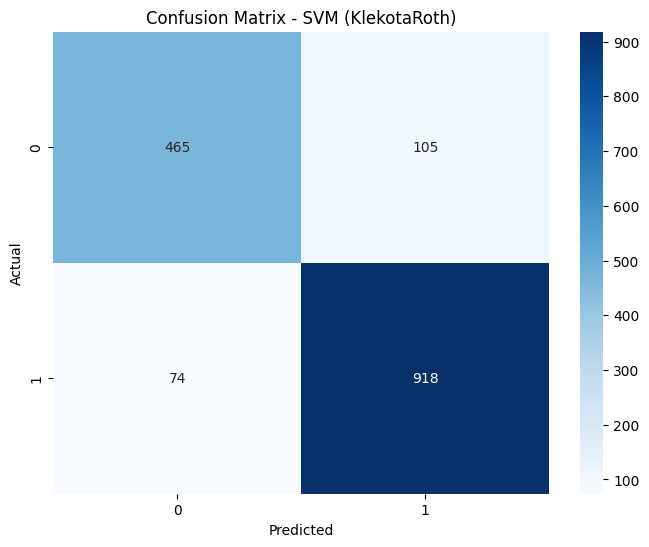

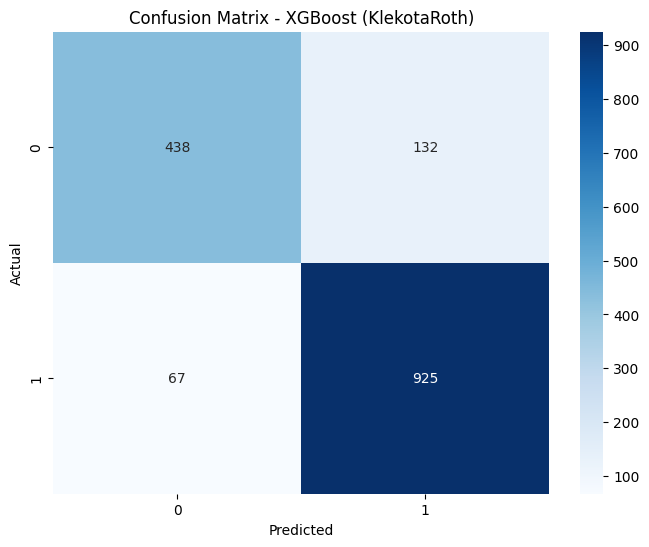

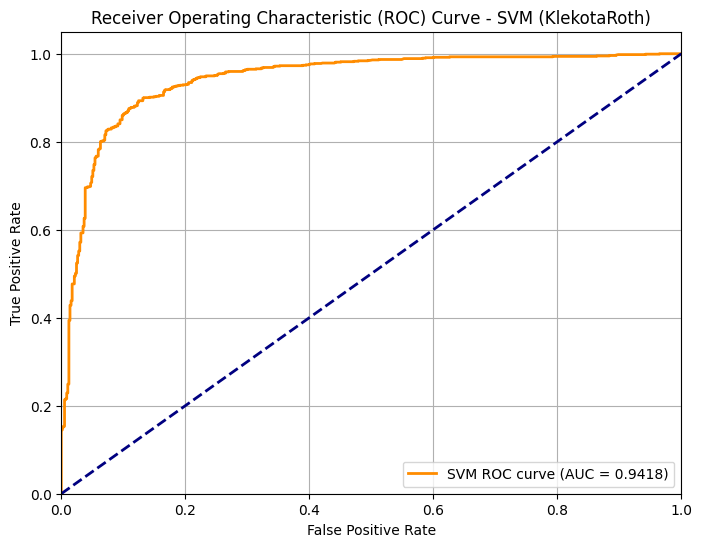

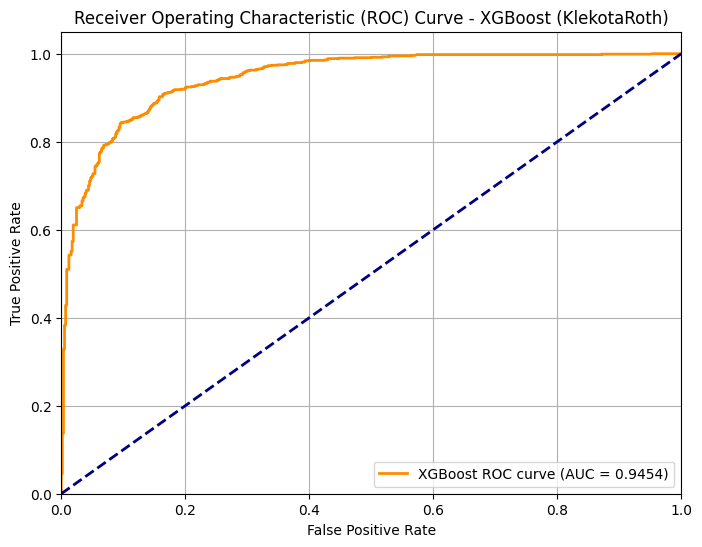

In [ ]:
# Make predictions with SVM
y_pred_svm = best_svm_klekota.predict(X_test)
y_pred_scores_svm = best_svm_klekota.predict_proba(X_test)[:, 1]

# Make predictions with XGBoost
y_pred_xgb = best_xgb_klekota.predict(X_test)
y_pred_scores_xgb = best_xgb_klekota.predict_proba(X_test)[:, 1]

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
mcc_xgb = matthews_corrcoef(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print evaluation metrics for SVM
print("SVM Evaluation Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"MCC: {mcc_svm:.4f}")

# Print evaluation metrics for XGBoost
print("\nXGBoost Evaluation Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"MCC: {mcc_xgb:.4f}")

# Save evaluation metrics for SVM to a text file
with open('evaluation_metrics_svm_klekota.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_svm:.4f}\n")
    f.write(f"F1 Score: {f1_svm:.4f}\n")
    f.write(f"Precision: {precision_svm:.4f}\n")
    f.write(f"Recall: {recall_svm:.4f}\n")
    f.write(f"MCC: {mcc_svm:.4f}\n")

# Save evaluation metrics for XGBoost to a text file
with open('evaluation_metrics_xgb_klekota.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_xgb:.4f}\n")
    f.write(f"F1 Score: {f1_xgb:.4f}\n")
    f.write(f"Precision: {precision_xgb:.4f}\n")
    f.write(f"Recall: {recall_xgb:.4f}\n")
    f.write(f"MCC: {mcc_xgb:.4f}\n")

# Plot confusion matrix for SVM and save as image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (KlekotaRoth)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_svm_klekota.png')
plt.show()

# Plot confusion matrix for XGBoost and save as image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (KlekotaRoth)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_xgb_klekota.png')
plt.show()

# Plot ROC curve for SVM and save as image
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM (KlekotaRoth)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_svm_klekota.png')
plt.show()

# Plot ROC curve for XGBoost and save as image
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost (KlekotaRoth)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_xgb_klekota.png')
plt.show()

MACC


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, matthews_corrcoef, roc_curve, auc
import joblib

# Load the dataset
macc_df = pd.read_csv('(MACC)best_f1_dataframe.csv')

# Fill NaN values with 0 in the DataFrame
macc_df = macc_df.fillna(0)

# Separate features and target labels
X_macc = macc_df
y_macc = data['BBB+/BBB-']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_macc, y_macc, test_size=0.2, random_state=42, stratify=y_macc)

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

In [ ]:
# Initialize the SVM classifier
svm = SVC(probability=True)

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV for SVM
grid_search_svm.fit(X_train, y_train)

# Get the best SVM model
best_svm_macc = grid_search_svm.best_estimator_

# Initialize the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV for XGBoost
grid_search_xgb.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_macc = grid_search_xgb.best_estimator_

In [ ]:
# Save the best SVM model
joblib.dump(best_svm_macc, 'best_svm_model_macc.pkl')

# Save the best XGBoost model
joblib.dump(best_xgb_macc, 'best_xgb_model_macc.pkl')

SVM Evaluation Metrics:
Accuracy: 0.8956
F1 Score: 0.8950
Precision: 0.8951
Recall: 0.8956
MCC: 0.7730

XGBoost Evaluation Metrics:
Accuracy: 0.8969
F1 Score: 0.8960
Precision: 0.8965
Recall: 0.8969
MCC: 0.7755


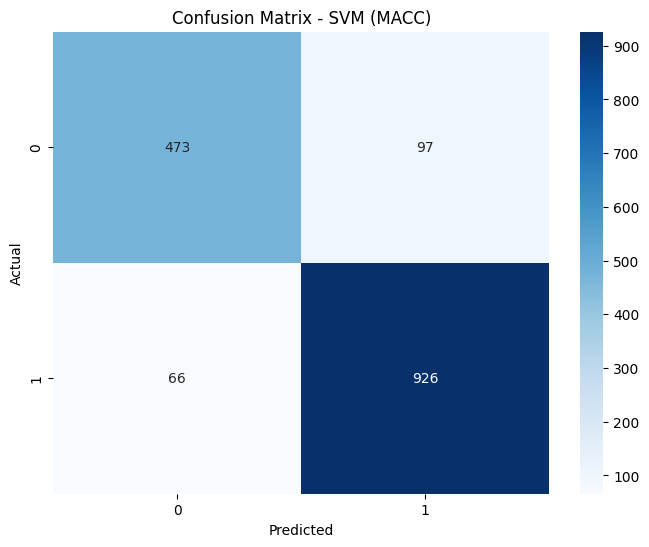

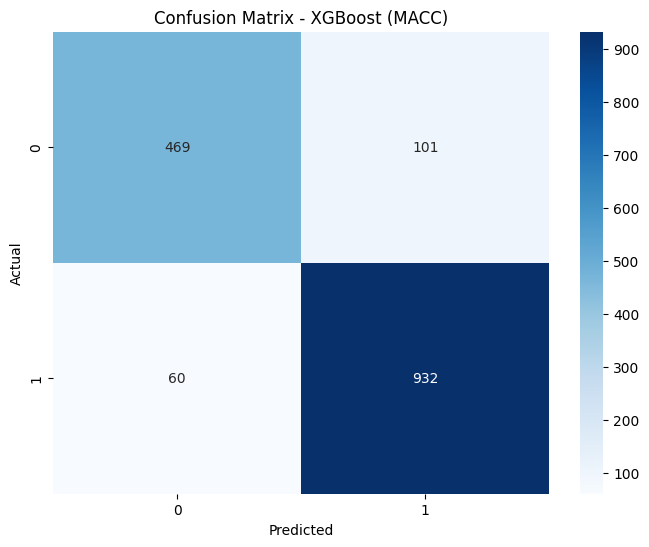

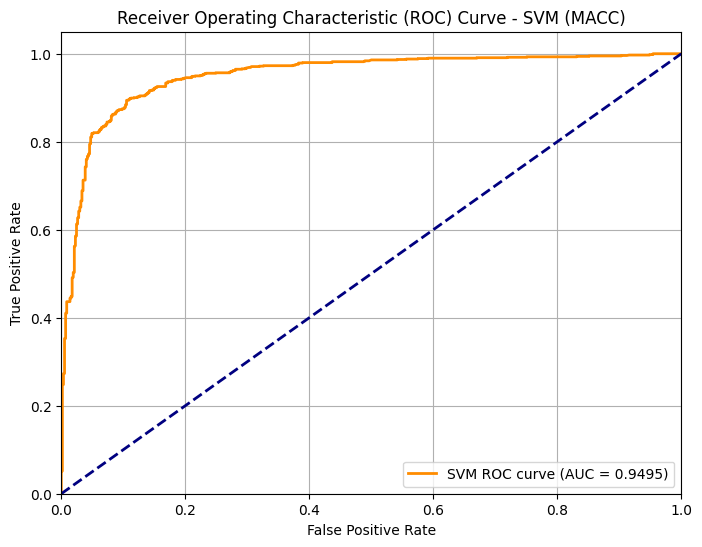

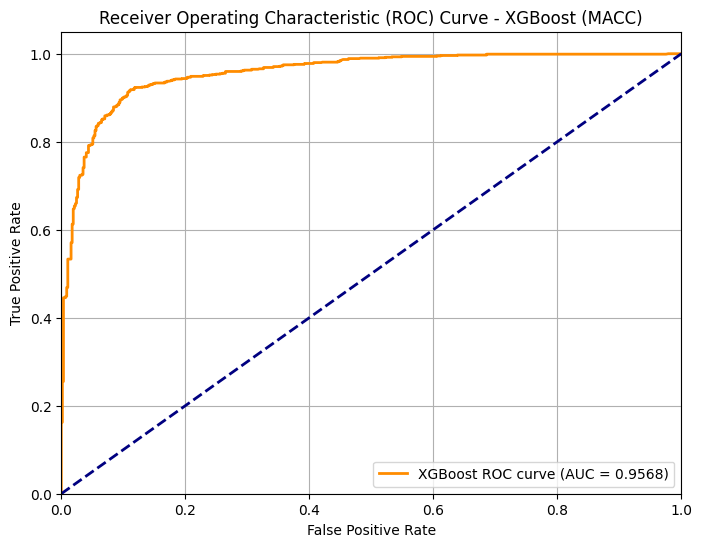

In [ ]:
# Make predictions with SVM
y_pred_svm = best_svm_macc.predict(X_test)
y_pred_scores_svm = best_svm_macc.predict_proba(X_test)[:, 1]

# Make predictions with XGBoost
y_pred_xgb = best_xgb_macc.predict(X_test)
y_pred_scores_xgb = best_xgb_macc.predict_proba(X_test)[:, 1]

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
mcc_xgb = matthews_corrcoef(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print evaluation metrics for SVM
print("SVM Evaluation Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"MCC: {mcc_svm:.4f}")

# Print evaluation metrics for XGBoost
print("\nXGBoost Evaluation Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"MCC: {mcc_xgb:.4f}")

# Save evaluation metrics for SVM to a text file
with open('evaluation_metrics_svm_macc.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_svm:.4f}\n")
    f.write(f"F1 Score: {f1_svm:.4f}\n")
    f.write(f"Precision: {precision_svm:.4f}\n")
    f.write(f"Recall: {recall_svm:.4f}\n")
    f.write(f"MCC: {mcc_svm:.4f}\n")

# Save evaluation metrics for XGBoost to a text file
with open('/content/drive/MyDrive/fingerprintsFS/evaluation_metrics_xgb_macc.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_xgb:.4f}\n")
    f.write(f"F1 Score: {f1_xgb:.4f}\n")
    f.write(f"Precision: {precision_xgb:.4f}\n")
    f.write(f"Recall: {recall_xgb:.4f}\n")
    f.write(f"MCC: {mcc_xgb:.4f}\n")

# Plot confusion matrix for SVM and save as image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (MACC)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_svm_macc.png')
plt.show()

# Plot confusion matrix for XGBoost and save as image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (MACC)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_xgb_macc.png')
plt.show()

# Plot ROC curve for SVM and save as image
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM (MACC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_svm_macc.png')
plt.show()

# Plot ROC curve for XGBoost and save as image
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost (MACC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_xgb_macc.png')
plt.show()

Estate

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, matthews_corrcoef, roc_curve, auc
import joblib

# Load the dataset
estate_df = pd.read_csv('(EState)best_f1_dataframe.csv')

# Fill NaN values with 0 in the DataFrame
estate_df = estate_df.fillna(0)

# Separate features and target labels
X_estate = estate_df
y_estate = data['BBB+/BBB-']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_estate, y_estate, test_size=0.2, random_state=42, stratify=y_estate)

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}


In [ ]:
# Initialize the SVM classifier
svm = SVC(probability=True)

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV for SVM
grid_search_svm.fit(X_train, y_train)

# Get the best SVM model
best_svm_estate = grid_search_svm.best_estimator_

# Initialize the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV for XGBoost
grid_search_xgb.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_estate = grid_search_xgb.best_estimator_

In [ ]:
# Save the best SVM model
joblib.dump(best_svm_estate, 'best_svm_model_estate.pkl')

# Save the best XGBoost model
joblib.dump(best_xgb_estate, 'best_xgb_model_estate.pkl')

SVM Evaluation Metrics:
Accuracy: 0.8624
F1 Score: 0.8611
Precision: 0.8613
Recall: 0.8624
MCC: 0.6995

XGBoost Evaluation Metrics:
Accuracy: 0.8476
F1 Score: 0.8453
Precision: 0.8465
Recall: 0.8476
MCC: 0.6658


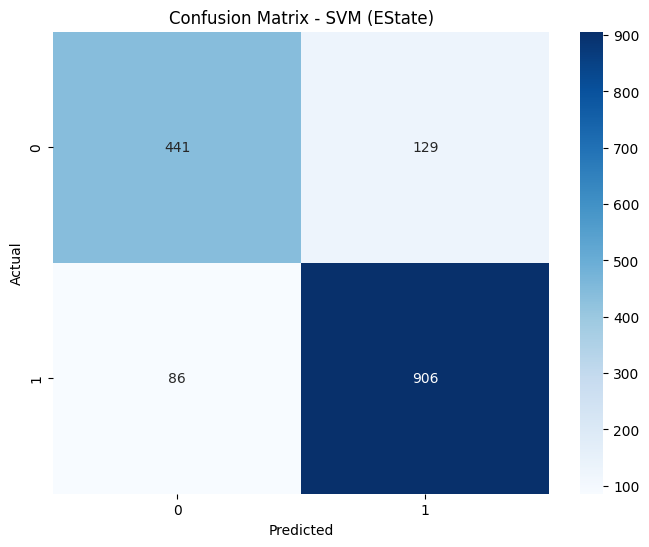

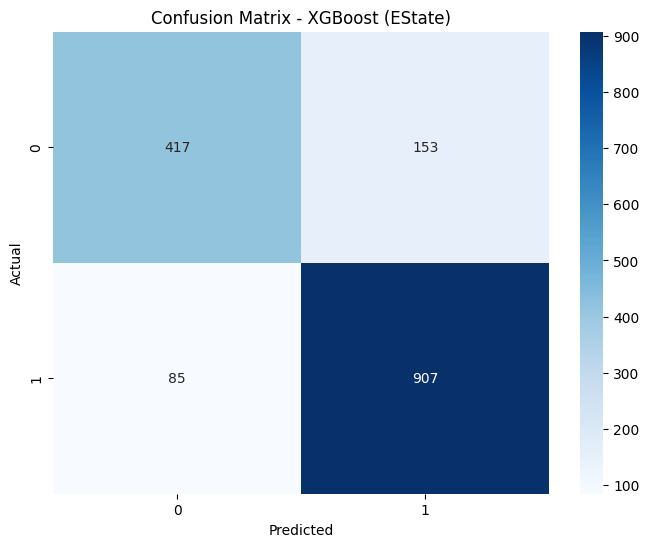

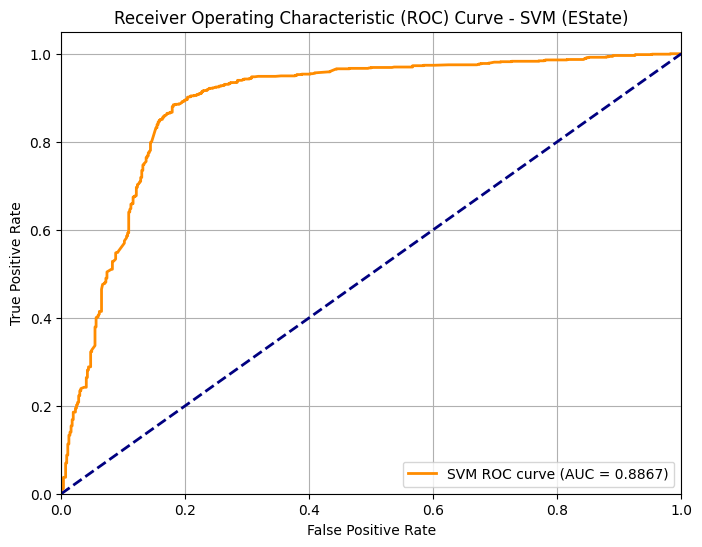

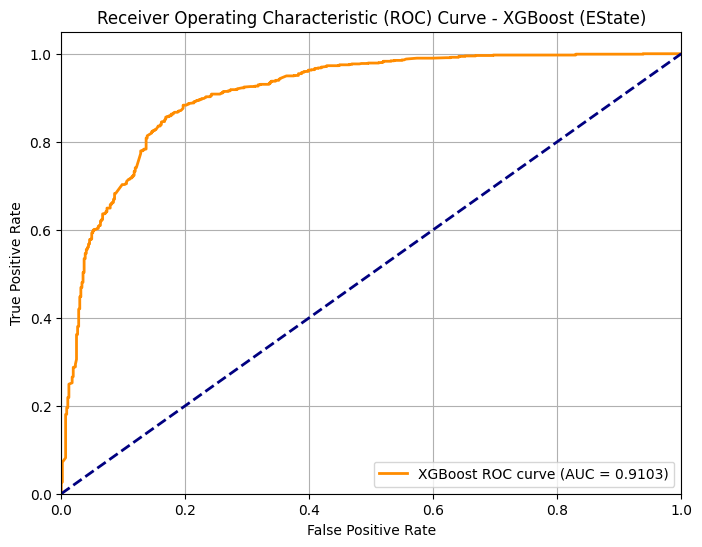

In [ ]:
# Make predictions with SVM
y_pred_svm = best_svm_estate.predict(X_test)
y_pred_scores_svm = best_svm_estate.predict_proba(X_test)[:, 1]

# Make predictions with XGBoost
y_pred_xgb = best_xgb_estate.predict(X_test)
y_pred_scores_xgb = best_xgb_estate.predict_proba(X_test)[:, 1]

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
mcc_xgb = matthews_corrcoef(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print evaluation metrics for SVM
print("SVM Evaluation Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"MCC: {mcc_svm:.4f}")

# Print evaluation metrics for XGBoost
print("\nXGBoost Evaluation Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"MCC: {mcc_xgb:.4f}")

# Save evaluation metrics for SVM to a text file
with open('evaluation_metrics_svm_estate.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_svm:.4f}\n")
    f.write(f"F1 Score: {f1_svm:.4f}\n")
    f.write(f"Precision: {precision_svm:.4f}\n")
    f.write(f"Recall: {recall_svm:.4f}\n")
    f.write(f"MCC: {mcc_svm:.4f}\n")

# Save evaluation metrics for XGBoost to a text file
with open('evaluation_metrics_xgb_estate.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_xgb:.4f}\n")
    f.write(f"F1 Score: {f1_xgb:.4f}\n")
    f.write(f"Precision: {precision_xgb:.4f}\n")
    f.write(f"Recall: {recall_xgb:.4f}\n")
    f.write(f"MCC: {mcc_xgb:.4f}\n")

# Plot confusion matrix for SVM and save as image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (EState)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_svm_estate.png')
plt.show()

# Plot confusion matrix for XGBoost and save as image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (EState)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_xgb_estate.png')
plt.show()

# Plot ROC curve for SVM and save as image
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM (EState)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_svm_estate.png')
plt.show()

# Plot ROC curve for XGBoost and save as image
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost (EState)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_xgb_estate.png')
plt.show()

AtomPair2D

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, matthews_corrcoef, roc_curve, auc
import joblib

# Load the AtomPairs2D dataset
atom_pairs_df = pd.read_csv('(AtomPairs2D)best_f1_dataframe.csv')

# Fill NaN values with 0 in the DataFrame
atom_pairs_df = atom_pairs_df.fillna(0)

# Separate features and target labels
X_atom_pairs = atom_pairs_df
y_atom_pairs = data['BBB+/BBB-']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_atom_pairs, y_atom_pairs, test_size=0.2, random_state=42, stratify=y_atom_pairs)

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Initialize the SVM classifier
svm = SVC(probability=True)

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV for SVM
grid_search_svm.fit(X_train, y_train)

# Get the best SVM model
best_svm_atom_pairs = grid_search_svm.best_estimator_




In [ ]:
# Initialize the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV for XGBoost
grid_search_xgb.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_atom_pairs = grid_search_xgb.best_estimator_


In [ ]:
# Save the best SVM model
joblib.dump(best_svm_atom_pairs, 'best_svm_model_atom_pairs.pkl')

# Save the best XGBoost model
joblib.dump(best_xgb_atom_pairs, 'best_xgb_model_atom_pairs.pkl')

SVM Evaluation Metrics:
Accuracy: 0.8579
F1 Score: 0.8573
Precision: 0.8571
Recall: 0.8579
MCC: 0.6913

XGBoost Evaluation Metrics:
Accuracy: 0.8579
F1 Score: 0.8554
Precision: 0.8575
Recall: 0.8579
MCC: 0.6884


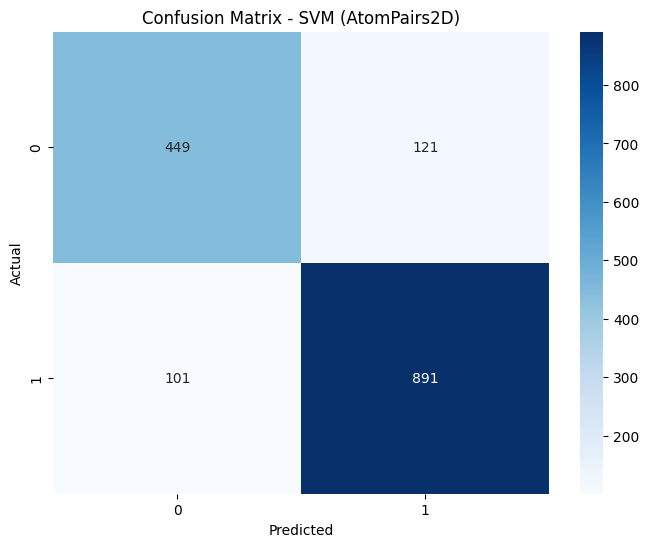

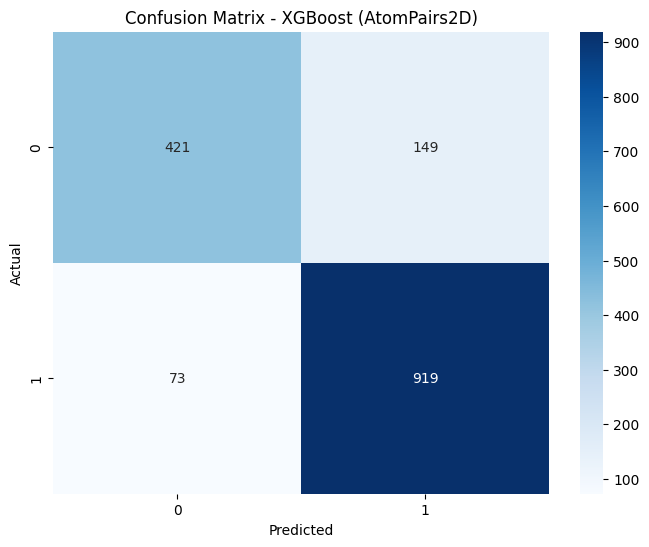

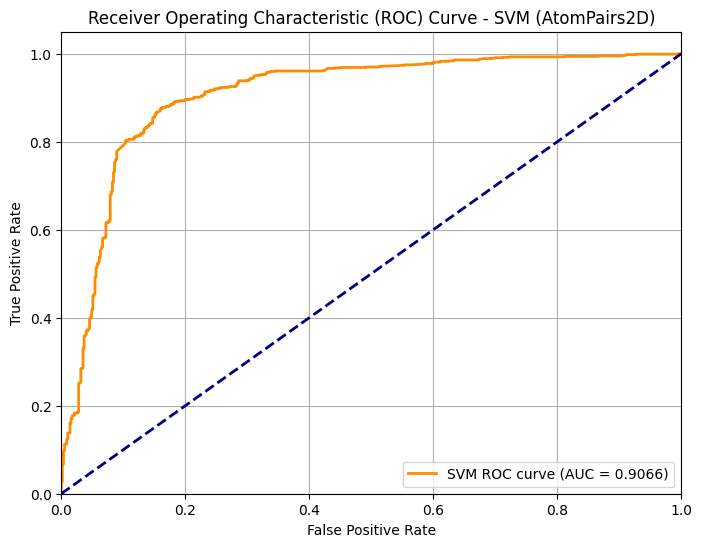

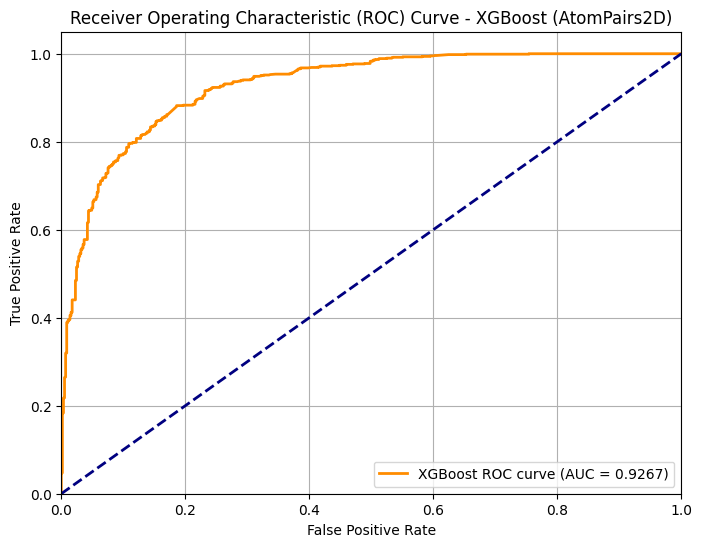

In [ ]:
# Make predictions with SVM
y_pred_svm = best_svm_atom_pairs.predict(X_test)
y_pred_scores_svm = best_svm_atom_pairs.predict_proba(X_test)[:, 1]

# Make predictions with XGBoost
y_pred_xgb = best_xgb_atom_pairs.predict(X_test)
y_pred_scores_xgb = best_xgb_atom_pairs.predict_proba(X_test)[:, 1]

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
mcc_xgb = matthews_corrcoef(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print evaluation metrics for SVM
print("SVM Evaluation Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"MCC: {mcc_svm:.4f}")

# Print evaluation metrics for XGBoost
print("\nXGBoost Evaluation Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"MCC: {mcc_xgb:.4f}")

# Save evaluation metrics for SVM to a text file
with open('evaluation_metrics_svm_atom_pairs.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_svm:.4f}\n")
    f.write(f"F1 Score: {f1_svm:.4f}\n")
    f.write(f"Precision: {precision_svm:.4f}\n")
    f.write(f"Recall: {recall_svm:.4f}\n")
    f.write(f"MCC: {mcc_svm:.4f}\n")

# Save evaluation metrics for XGBoost to a text file
with open('evaluation_metrics_xgb_atom_pairs.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_xgb:.4f}\n")
    f.write(f"F1 Score: {f1_xgb:.4f}\n")
    f.write(f"Precision: {precision_xgb:.4f}\n")
    f.write(f"Recall: {recall_xgb:.4f}\n")
    f.write(f"MCC: {mcc_xgb:.4f}\n")

# Plot confusion matrix for SVM and save as image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (AtomPairs2D)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_svm_atom_pairs.png')
plt.show()

# Plot confusion matrix for XGBoost and save as image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (AtomPairs2D)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_xgb_atom_pairs.png')
plt.show()

# Plot ROC curve for SVM and save as image
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM (AtomPairs2D)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_svm_atom_pairs.png')
plt.show()

# Plot ROC curve for XGBoost and save as image
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost (AtomPairs2D)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_xgb_atom_pairs.png')
plt.show()

SUBSTRUCTURE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, matthews_corrcoef, roc_curve, auc
import joblib

# Load the Substructure dataset
substructure_df = pd.read_csv('(Substructure)best_f1_dataframe.csv')

# Fill NaN values with 0 in the DataFrame
substructure_df = substructure_df.fillna(0)

# Separate features and target labels
X_substructure = substructure_df  # assuming 'BBB+/BBB-' is the target column name
y_substructure = data['BBB+/BBB-']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_substructure, y_substructure, test_size=0.2, random_state=42, stratify=y_substructure)

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Initialize the SVM classifier
svm = SVC(probability=True)

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV for SVM
grid_search_svm.fit(X_train, y_train)

# Get the best SVM model
best_svm_substructure = grid_search_svm.best_estimator_

# Initialize the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV for XGBoost
grid_search_xgb.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_substructure = grid_search_xgb.best_estimator_

# Save the best SVM model
joblib.dump(best_svm_substructure, 'best_svm_model_substructure.pkl')

# Save the best XGBoost model
joblib.dump(best_xgb_substructure, 'best_xgb_model_substructure.pkl')


SVM Evaluation Metrics:
Accuracy: 0.8835
F1 Score: 0.8820
Precision: 0.8832
Recall: 0.8835
MCC: 0.7456

XGBoost Evaluation Metrics:
Accuracy: 0.8752
F1 Score: 0.8737
Precision: 0.8746
Recall: 0.8752
MCC: 0.7272


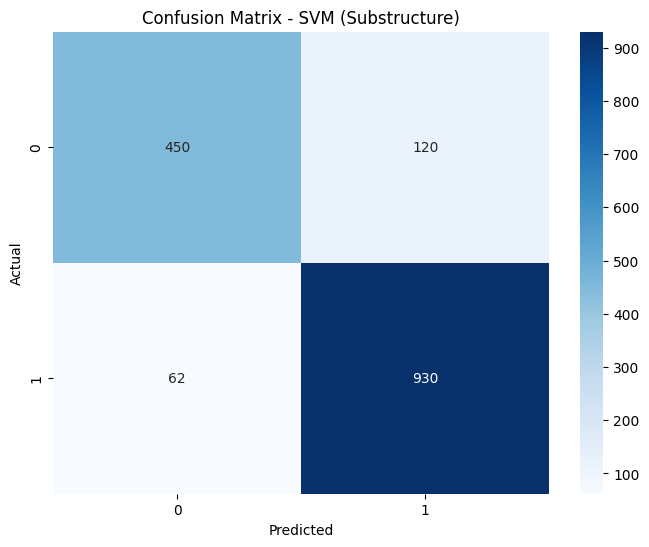

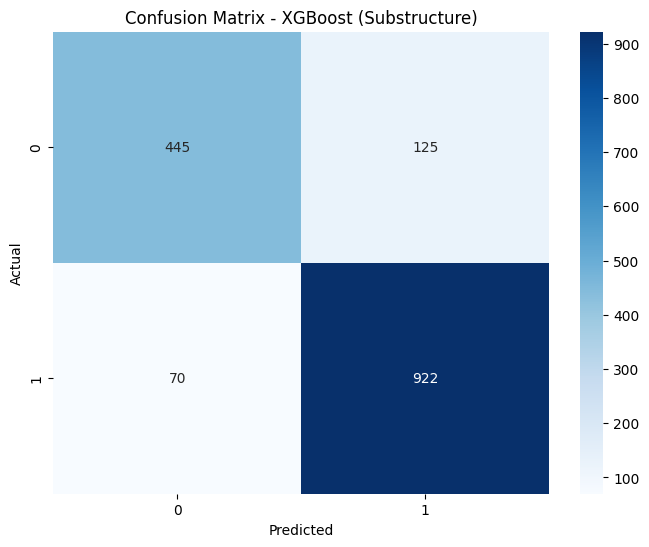

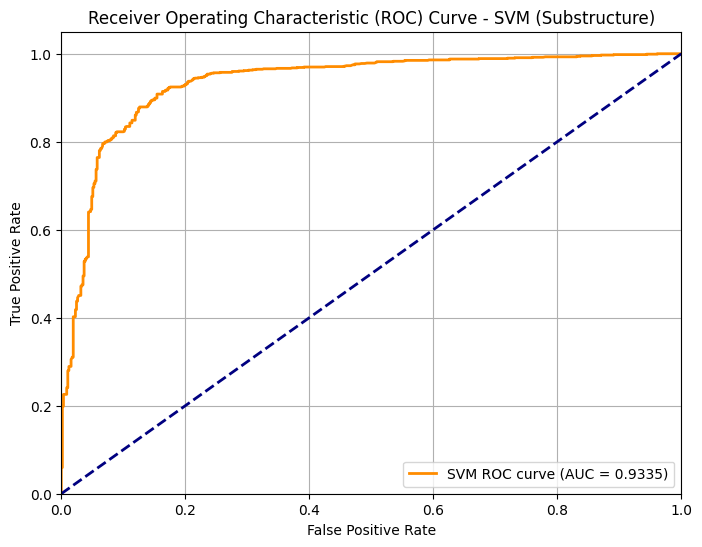

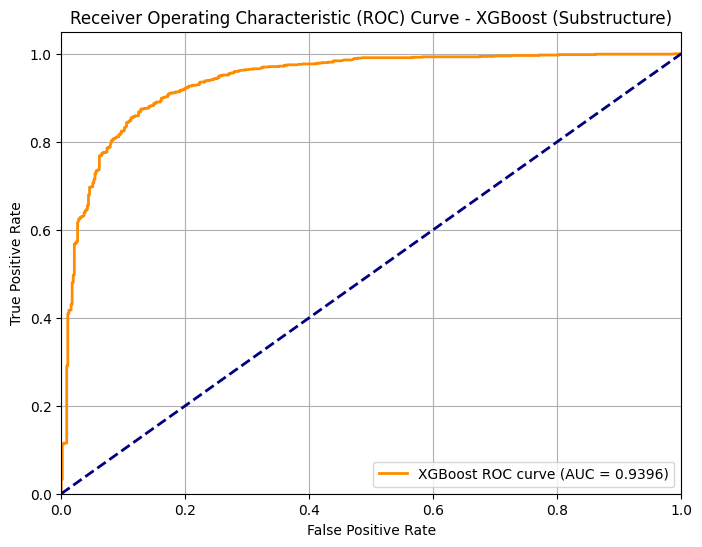

In [ ]:
# Make predictions with SVM
y_pred_svm = best_svm_substructure.predict(X_test)
y_pred_scores_svm = best_svm_substructure.predict_proba(X_test)[:, 1]

# Make predictions with XGBoost
y_pred_xgb = best_xgb_substructure.predict(X_test)
y_pred_scores_xgb = best_xgb_substructure.predict_proba(X_test)[:, 1]

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
mcc_xgb = matthews_corrcoef(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print evaluation metrics for SVM
print("SVM Evaluation Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"MCC: {mcc_svm:.4f}")

# Print evaluation metrics for XGBoost
print("\nXGBoost Evaluation Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"MCC: {mcc_xgb:.4f}")

# Save evaluation metrics for SVM to a text file
with open('evaluation_metrics_svm_substructure.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_svm:.4f}\n")
    f.write(f"F1 Score: {f1_svm:.4f}\n")
    f.write(f"Precision: {precision_svm:.4f}\n")
    f.write(f"Recall: {recall_svm:.4f}\n")
    f.write(f"MCC: {mcc_svm:.4f}\n")

# Save evaluation metrics for XGBoost to a text file
with open('evaluation_metrics_xgb_substructure.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_xgb:.4f}\n")
    f.write(f"F1 Score: {f1_xgb:.4f}\n")
    f.write(f"Precision: {precision_xgb:.4f}\n")
    f.write(f"Recall: {recall_xgb:.4f}\n")
    f.write(f"MCC: {mcc_xgb:.4f}\n")

# Plot confusion matrix for SVM and save as image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (Substructure)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_svm_substructure.png')
plt.show()

# Plot confusion matrix for XGBoost and save as image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (Substructure)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_xgb_substructure.png')
plt.show()

# Plot ROC curve for SVM and save as image
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM (Substructure)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_svm_substructure.png')
plt.show()

# Plot ROC curve for XGBoost and save as image
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost (Substructure)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_xgb_substructure.png')
plt.show()

CDK EXTENDED

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, matthews_corrcoef, roc_curve, auc
import joblib
# Load the CDKextended dataset
cdk_extended_df = pd.read_csv('(CDKextended)best_f1_dataframe.csv')

# Fill NaN values with 0 in the DataFrame
cdk_extended_df = cdk_extended_df.fillna(0)

# Separate features and target labels
X= cdk_extended_df
y= data['BBB+/BBB-']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
import xgboost as xgb
import time


# Support Vector Machine with hyperparameter tuning
start_time = time.time()
svm_param_grid = {'C': [0.1, 1, 10,100],
                  'gamma': ['auto', 'scale'],
                  'kernel': ['linear', 'rbf']}

svm_grid_search = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=5, scoring='f1')
svm_grid_search.fit(X_train, y_train)
svm_model = svm_grid_search.best_estimator_
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1_score = f1_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_mcc = matthews_corrcoef(y_test, svm_pred)
svm_auc_roc = roc_auc_score(y_test, svm_pred)

svm_confusion_matrix = confusion_matrix(y_test, svm_pred)

print("\nSupport Vector Machine:")
print("Best Parameters:", svm_grid_search.best_params_)
print("Accuracy:", svm_accuracy)
print("F1 Score:", svm_f1_score)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("AUC-ROC:", svm_auc_roc)
print(f"MCC:", svm_mcc)
print("Confusion Matrix:\n", svm_confusion_matrix)

# Calculate elapsed time for SVM
svm_time = time.time() - start_time

# XGBoost with hyperparameter tuning
start_time = time.time()
xgb_param_grid = {'n_estimators': [50, 100, 150],
                  'learning_rate': [0.1, 0.01, 0.2],
                  'max_depth': [3, 4, 5]}

xgb_grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42), xgb_param_grid, cv=5, scoring='f1')
xgb_grid_search.fit(X_train, y_train)
xgb_model = xgb_grid_search.best_estimator_
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_f1_score = f1_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_auc_roc = roc_auc_score(y_test, xgb_pred)
xgb_mcc = matthews_corrcoef(y_test, xgb_pred)
xgb_confusion_matrix = confusion_matrix(y_test, xgb_pred)

print("\nXGBoost:")
print("Best Parameters:", xgb_grid_search.best_params_)
print("Accuracy:", xgb_accuracy)
print("F1 Score:", xgb_f1_score)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("AUC-ROC:", xgb_auc_roc)
print(f"MCC:", xgb_mcc)
print("Confusion Matrix:\n", xgb_confusion_matrix)

# Calculate elapsed time for XGBoost
xgb_time = time.time() - start_time

print("Total Elapsed Time for Support Vector Machine:", svm_time)

print("Total Elapsed Time for XGBoost:", xgb_time)



In [ ]:
# Save the best SVM model
joblib.dump(svm_model, 'best_svm_model_cdk_extended.pkl')

In [ ]:
# Save the best XGBoost model
joblib.dump(xgb_model, 'best_xgb_model_cdk_extended.pkl')

In [ ]:
# Save evaluation metrics for SVM to a text file
with open('evaluation_metrics_svm_cdk_extended.txt', 'w') as f:
    f.write(f"Accuracy: {svm_accuracy:.4f}\n")
    f.write(f"F1 Score: {svm_f1_score:.4f}\n")
    f.write(f"Precision: {svm_precision:.4f}\n")
    f.write(f"Recall: {svm_recall:.4f}\n")
    f.write(f"MCC: {svm_mcc:.4f}\n")

# Save evaluation metrics for XGBoost to a text file
with open('evaluation_metrics_xgb_cdk_extended.txt', 'w') as f:
    f.write(f"Accuracy: {xgb_accuracy:.4f}\n")
    f.write(f"F1 Score: {xgb_f1_score:.4f}\n")
    f.write(f"Precision: {xgb_precision:.4f}\n")
    f.write(f"Recall: {xgb_recall:.4f}\n")
    f.write(f"MCC: {xgb_mcc:.4f}\n")

# Plot confusion matrix for SVM and save as image
plt.figure(figsize=(8, 6))
sns.heatmap(svm_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (CDKextended)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_svm_cdk_extended.png')
plt.show()

# Plot confusion matrix for XGBoost and save as image
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (CDKextended)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_xgb_cdk_extended.png')
plt.show()



# SVM ROC Curve
svm_y_pred_proba = svm_model.decision_function(X_test)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_y_pred_proba)
svm_auc = roc_auc_score(y_test, svm_y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, color='darkorange', lw=2, label=f'SVM ROC curve (AUC = {svm_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM (CDKextended)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_svm_cdk_extended.png')
plt.show()

# XGBoost ROC Curve
xgb_y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_pred_proba)
xgb_auc = roc_auc_score(y_test, xgb_y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, color='darkorange', lw=2, label=f'XGBoost ROC curve (AUC = {xgb_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost (CDKextended)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_xgb_cdk_extended.png')
plt.show()

cdk graphonly

In [ ]:
# Load the CDKgraphonly dataset
cdk_graphonly_df = pd.read_csv('(CDKgraphonly)best_f1_dataframe.csv')

# Fill NaN values with 0 in the DataFrame
cdk_graphonly_df = cdk_graphonly_df.fillna(0)

# Separate features and target labels
X_cdk_graphonly = cdk_graphonly_df.drop(columns=['BBB+/BBB-'])  # Assuming the target column is named 'BBB+/BBB-'
y_cdk_graphonly = cdk_graphonly_df['BBB+/BBB-']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cdk_graphonly, y_cdk_graphonly, test_size=0.2, random_state=42, stratify=y_cdk_graphonly)

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Initialize the SVM classifier
svm = SVC(probability=True)

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV for SVM
grid_search_svm.fit(X_train, y_train)

# Get the best SVM model
best_svm_cdk_graphonly = grid_search_svm.best_estimator_

# Initialize the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV for XGBoost
grid_search_xgb.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_cdk_graphonly = grid_search_xgb.best_estimator_


In [ ]:
# Save the best SVM model
joblib.dump(best_svm_cdk_graphonly, 'best_svm_model_cdk_graphonly.pkl')

# Save the best XGBoost model
joblib.dump(best_xgb_cdk_graphonly, 'best_xgb_model_cdk_graphonly.pkl')


In [ ]:
# Make predictions with SVM
y_pred_svm = best_svm_cdk_graphonly.predict(X_test)
y_pred_scores_svm = best_svm_cdk_graphonly.predict_proba(X_test)[:, 1]

# Make predictions with XGBoost
y_pred_xgb = best_xgb_cdk_graphonly.predict(X_test)
y_pred_scores_xgb = best_xgb_cdk_graphonly.predict_proba(X_test)[:, 1]

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
mcc_xgb = matthews_corrcoef(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print evaluation metrics for SVM
print("SVM Evaluation Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"MCC: {mcc_svm:.4f}")

# Print evaluation metrics for XGBoost
print("\nXGBoost Evaluation Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"MCC: {mcc_xgb:.4f}")

# Save evaluation metrics for SVM to a text file
with open('evaluation_metrics_svm_cdk_graphonly.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_svm:.4f}\n")
    f.write(f"F1 Score: {f1_svm:.4f}\n")
    f.write(f"Precision: {precision_svm:.4f}\n")
    f.write(f"Recall: {recall_svm:.4f}\n")
    f.write(f"MCC: {mcc_svm:.4f}\n")

# Save evaluation metrics for XGBoost to a text file
with open('evaluation_metrics_xgb_cdk_graphonly.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_xgb:.4f}\n")
    f.write(f"F1 Score: {f1_xgb:.4f}\n")
    f.write(f"Precision: {precision_xgb:.4f}\n")
    f.write(f"Recall: {recall_xgb:.4f}\n")
    f.write(f"MCC: {mcc_xgb:.4f}\n")

# Plot confusion matrix for SVM and save as image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (CDKgraphonly)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_svm_cdk_graphonly.png')
plt.show()

# Plot confusion matrix for XGBoost and save as image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (CDKgraphonly)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_xgb_cdk_graphonly.png')
plt.show()

# Plot ROC curve for SVM and save as image
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM (CDKgraphonly)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_svm_cdk_graphonly.png')
plt.show()

# Plot ROC curve for XGBoost and save as image
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title

Pubchem

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, matthews_corrcoef, roc_curve, auc
import joblib

# Load the PubChem dataset
pubchem_df = pd.read_csv('(PubChem)best_f1_dataframe.csv')

# Fill NaN values with 0 in the DataFrame
pubchem_df = pubchem_df.fillna(0)

# Separate features and target labels
X_pubchem = pubchem_df
y_pubchem = data['BBB+/BBB-']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pubchem, y_pubchem, test_size=0.2, random_state=42, stratify=y_pubchem)

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

In [ ]:
# Initialize the SVM classifier
svm = SVC(probability=True)

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV for SVM
grid_search_svm.fit(X_train, y_train)

# Get the best SVM model
best_svm_pubchem = grid_search_svm.best_estimator_

# Initialize the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV for XGBoost
grid_search_xgb.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_pubchem = grid_search_xgb.best_estimator_

In [ ]:
# Save the best SVM model
joblib.dump(best_svm_pubchem, 'best_svm_model_pubchem.pkl')

# Save the best XGBoost model
joblib.dump(best_xgb_pubchem, 'best_xgb_model_pubchem.pkl')

SVM Evaluation Metrics:
Accuracy: 0.8886
F1 Score: 0.8880
Precision: 0.8880
Recall: 0.8886
MCC: 0.7578

XGBoost Evaluation Metrics:
Accuracy: 0.8944
F1 Score: 0.8934
Precision: 0.8939
Recall: 0.8944
MCC: 0.7698


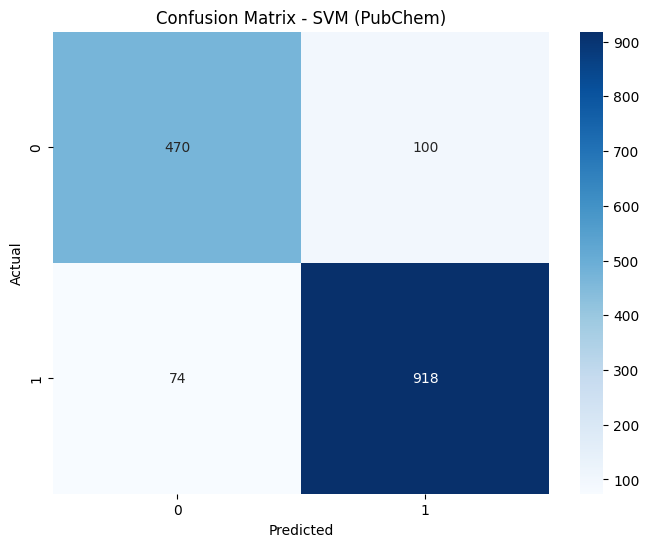

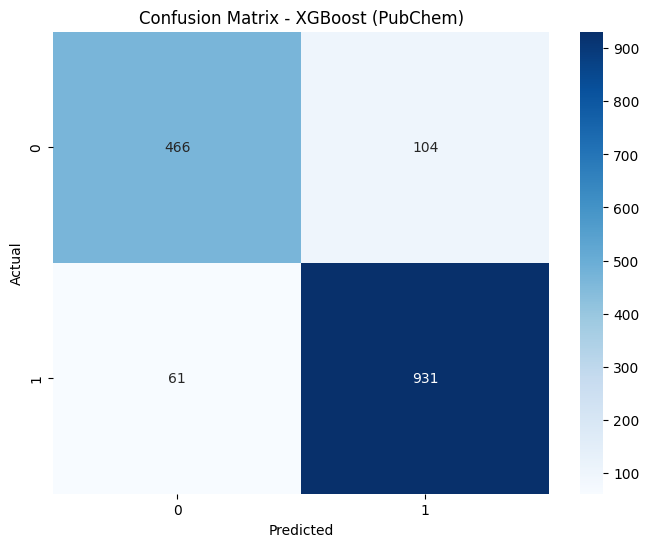

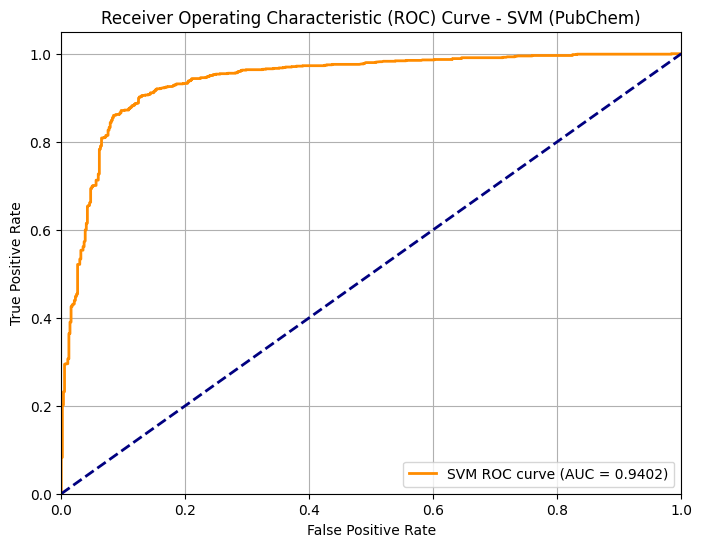

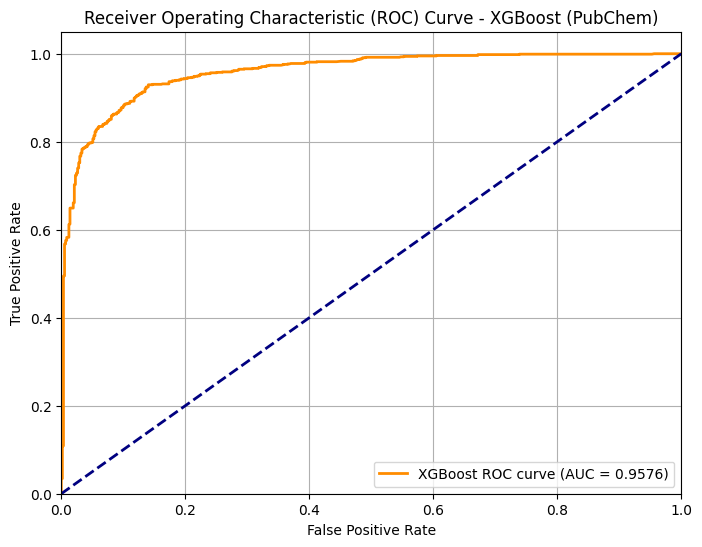

In [ ]:
# Make predictions with SVM
y_pred_svm = best_svm_pubchem.predict(X_test)
y_pred_scores_svm = best_svm_pubchem.predict_proba(X_test)[:, 1]

# Make predictions with XGBoost
y_pred_xgb = best_xgb_pubchem.predict(X_test)
y_pred_scores_xgb = best_xgb_pubchem.predict_proba(X_test)[:, 1]

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
mcc_xgb = matthews_corrcoef(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print evaluation metrics for SVM
print("SVM Evaluation Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"MCC: {mcc_svm:.4f}")

# Print evaluation metrics for XGBoost
print("\nXGBoost Evaluation Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"MCC: {mcc_xgb:.4f}")

# Save evaluation metrics for SVM to a text file
with open('evaluation_metrics_svm_pubchem.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_svm:.4f}\n")
    f.write(f"F1 Score: {f1_svm:.4f}\n")
    f.write(f"Precision: {precision_svm:.4f}\n")
    f.write(f"Recall: {recall_svm:.4f}\n")
    f.write(f"MCC: {mcc_svm:.4f}\n")

# Save evaluation metrics for XGBoost to a text file
with open('evaluation_metrics_xgb_pubchem.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_xgb:.4f}\n")
    f.write(f"F1 Score: {f1_xgb:.4f}\n")
    f.write(f"Precision: {precision_xgb:.4f}\n")
    f.write(f"Recall: {recall_xgb:.4f}\n")
    f.write(f"MCC: {mcc_xgb:.4f}\n")

# Plot confusion matrix for SVM and save as image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (PubChem)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_svm_pubchem.png')
plt.show()

# Plot confusion matrix for XGBoost and save as image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (PubChem)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_xgb_pubchem.png')
plt.show()

# Plot ROC curve for SVM and save as image
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM (PubChem)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_svm_pubchem.png')
plt.show()

# Plot ROC curve for XGBoost and save as image
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost (PubChem)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_xgb_pubchem.png')
plt.show()

CDK

In [ ]:
# Load the CDK dataset
cdk_df = pd.read_csv('(CDK)best_f1_dataframe.csv')

# Fill NaN values with 0 in the DataFrame
cdk_df = cdk_df.fillna(0)

# Separate features and target labels
X_cdk = cdk_df
y_cdk = data['BBB+/BBB-']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cdk, y_cdk, test_size=0.2, random_state=42, stratify=y_cdk)

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

In [ ]:

# Initialize the SVM classifier
svm = SVC(probability=True)

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV for SVM
grid_search_svm.fit(X_train, y_train)

# Get the best SVM model
best_svm_cdk = grid_search_svm.best_estimator_

# Initialize the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV for XGBoost
grid_search_xgb.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_cdk = grid_search_xgb.best_estimator_

In [ ]:
# Save the best SVM model
joblib.dump(best_svm_cdk, 'best_svm_model_cdk.pkl')

# Save the best XGBoost model
joblib.dump(best_xgb_cdk, 'best_xgb_model_cdk.pkl')


In [ ]:
# Make predictions with SVM
y_pred_svm = best_svm_cdk.predict(X_test)
y_pred_scores_svm = best_svm_cdk.predict_proba(X_test)[:, 1]

# Make predictions with XGBoost
y_pred_xgb = best_xgb_cdk.predict(X_test)
y_pred_scores_xgb = best_xgb_cdk.predict_proba(X_test)[:, 1]

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
mcc_xgb = matthews_corrcoef(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print evaluation metrics for SVM
print("SVM Evaluation Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"MCC: {mcc_svm:.4f}")

# Print evaluation metrics for XGBoost
print("\nXGBoost Evaluation Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"MCC: {mcc_xgb:.4f}")

# Save evaluation metrics for SVM to a text file
with open('evaluation_metrics_svm_cdk.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_svm:.4f}\n")
    f.write(f"F1 Score: {f1_svm:.4f}\n")
    f.write(f"Precision: {precision_svm:.4f}\n")
    f.write(f"Recall: {recall_svm:.4f}\n")
    f.write(f"MCC: {mcc_svm:.4f}\n")

# Save evaluation metrics for XGBoost to a text file
with open('evaluation_metrics_xgb_cdk.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_xgb:.4f}\n")
    f.write(f"F1 Score: {f1_xgb:.4f}\n")
    f.write(f"Precision: {precision_xgb:.4f}\n")
    f.write(f"Recall: {recall_xgb:.4f}\n")
    f.write(f"MCC: {mcc_xgb:.4f}\n")

# Plot confusion matrix for SVM and save as image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (CDK)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_svm_cdk.png')
plt.show()

# Plot confusion matrix for XGBoost and save as image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (CDK)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_xgb_cdk.png')
plt.show()

# Plot ROC curve for SVM and save as image
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM (CDK)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_svm_cdk.png')
plt.show()

# Plot ROC curve for XGBoost and save as image
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost (CDK)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_xgb_cdk.png')
plt.show()

Pubchem

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, matthews_corrcoef, roc_curve, auc
import joblib

# Load the PubChem dataset
pubchem_df = pd.read_csv('(PubChem)best_f1_dataframe.csv')

# Fill NaN values with 0 in the DataFrame
pubchem_df = pubchem_df.fillna(0)

# Separate features and target labels
X_pubchem = pubchem_df
y_pubchem = data['BBB+/BBB-']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pubchem, y_pubchem, test_size=0.2, random_state=42, stratify=y_pubchem)

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

In [ ]:
# Initialize the SVM classifier
svm = SVC(probability=True)

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV for SVM
grid_search_svm.fit(X_train, y_train)

# Get the best SVM model
best_svm_pubchem = grid_search_svm.best_estimator_

# Initialize the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit GridSearchCV for XGBoost
grid_search_xgb.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_pubchem = grid_search_xgb.best_estimator_

In [ ]:
# Save the best SVM model
joblib.dump(best_svm_pubchem, 'best_svm_model_pubchem.pkl')

# Save the best XGBoost model
joblib.dump(best_xgb_pubchem, 'best_xgb_model_pubchem.pkl')

In [ ]:
# Make predictions with SVM
y_pred_svm = best_svm_pubchem.predict(X_test)
y_pred_scores_svm = best_svm_pubchem.predict_proba(X_test)[:, 1]

# Make predictions with XGBoost
y_pred_xgb = best_xgb_pubchem.predict(X_test)
y_pred_scores_xgb = best_xgb_pubchem.predict_proba(X_test)[:, 1]

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
mcc_xgb = matthews_corrcoef(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print evaluation metrics for SVM
print("SVM Evaluation Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"MCC: {mcc_svm:.4f}")

# Print evaluation metrics for XGBoost
print("\nXGBoost Evaluation Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"MCC: {mcc_xgb:.4f}")

# Save evaluation metrics for SVM to a text file
with open('evaluation_metrics_svm_pubchem.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_svm:.4f}\n")
    f.write(f"F1 Score: {f1_svm:.4f}\n")
    f.write(f"Precision: {precision_svm:.4f}\n")
    f.write(f"Recall: {recall_svm:.4f}\n")
    f.write(f"MCC: {mcc_svm:.4f}\n")

# Save evaluation metrics for XGBoost to a text file
with open('evaluation_metrics_xgb_pubchem.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_xgb:.4f}\n")
    f.write(f"F1 Score: {f1_xgb:.4f}\n")
    f.write(f"Precision: {precision_xgb:.4f}\n")
    f.write(f"Recall: {recall_xgb:.4f}\n")
    f.write(f"MCC: {mcc_xgb:.4f}\n")

# Plot confusion matrix for SVM and save as image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (PubChem)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_svm_pubchem.png')
plt.show()

# Plot confusion matrix for XGBoost and save as image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (PubChem)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_xgb_pubchem.png')
plt.show()

# Plot ROC curve for SVM and save as image
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM (PubChem)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_svm_pubchem.png')
plt.show()

# Plot ROC curve for XGBoost and save as image
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost (PubChem)')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve_xgb_pubchem.png')
plt.show()

SHAP explanability

In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 8.0 MB/s eta 0:00:00


In [ ]:
import pickle
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Load the XGBoost model
model_path = 'best_xgb_model_macc.pkl'
with open(model_path, 'rb') as file:
    xgb_model = pickle.load(file)


# Assuming 'MACCVali_new' contains features and 'target' contains the true labels
X_val = MACCVali_new
y_val = MACCVali['Name']


In [ ]:
# Initialize the SHAP explainer with the XGBoost model and the validation dataset
explainer = shap.Explainer(xgb_model, X_val)

# Compute SHAP values for all examples
shap_values = explainer(X_val)


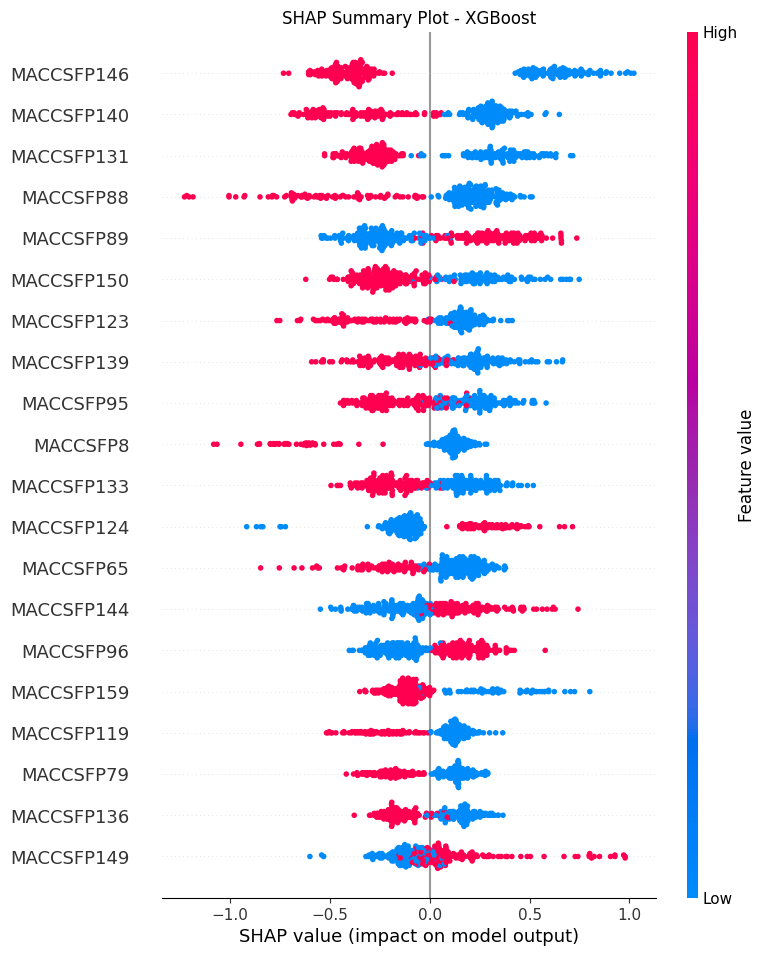

In [ ]:
shap.summary_plot(shap_values, X_val, show=False)
plt.title('SHAP Summary Plot - XGBoost')
plt.savefig('shap_summary_plot.png')
plt.show()


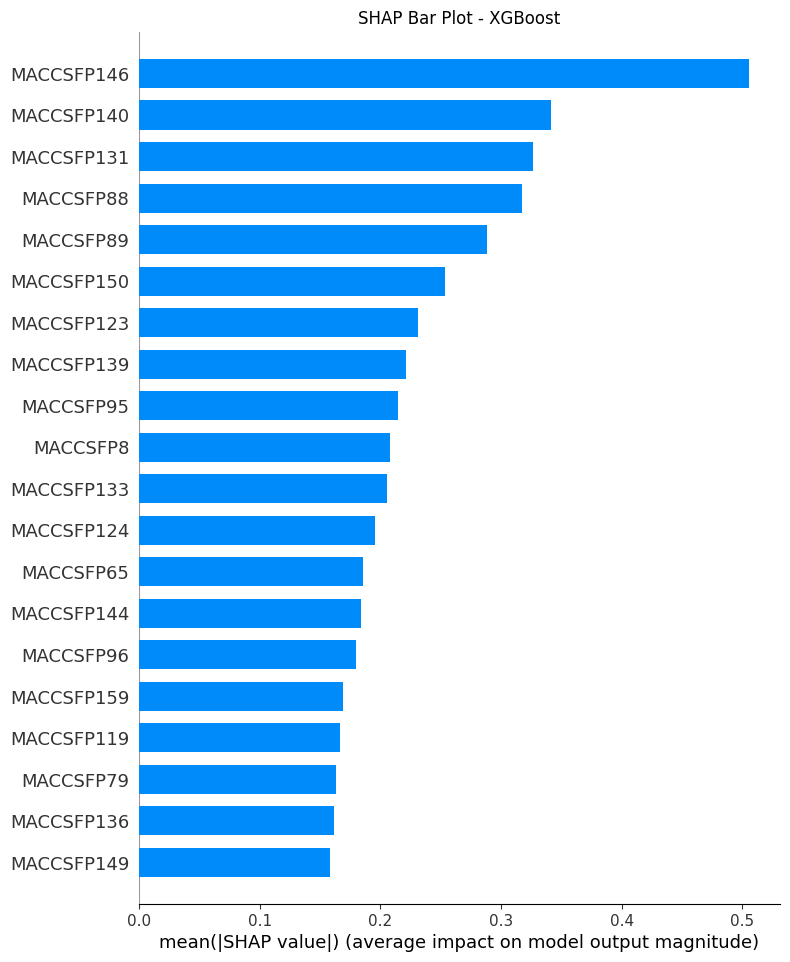

In [ ]:
shap.summary_plot(shap_values, X_val, plot_type='bar', show=False)
plt.title('SHAP Bar Plot - XGBoost')
plt.savefig('shap_bar_plot.png')
plt.show()


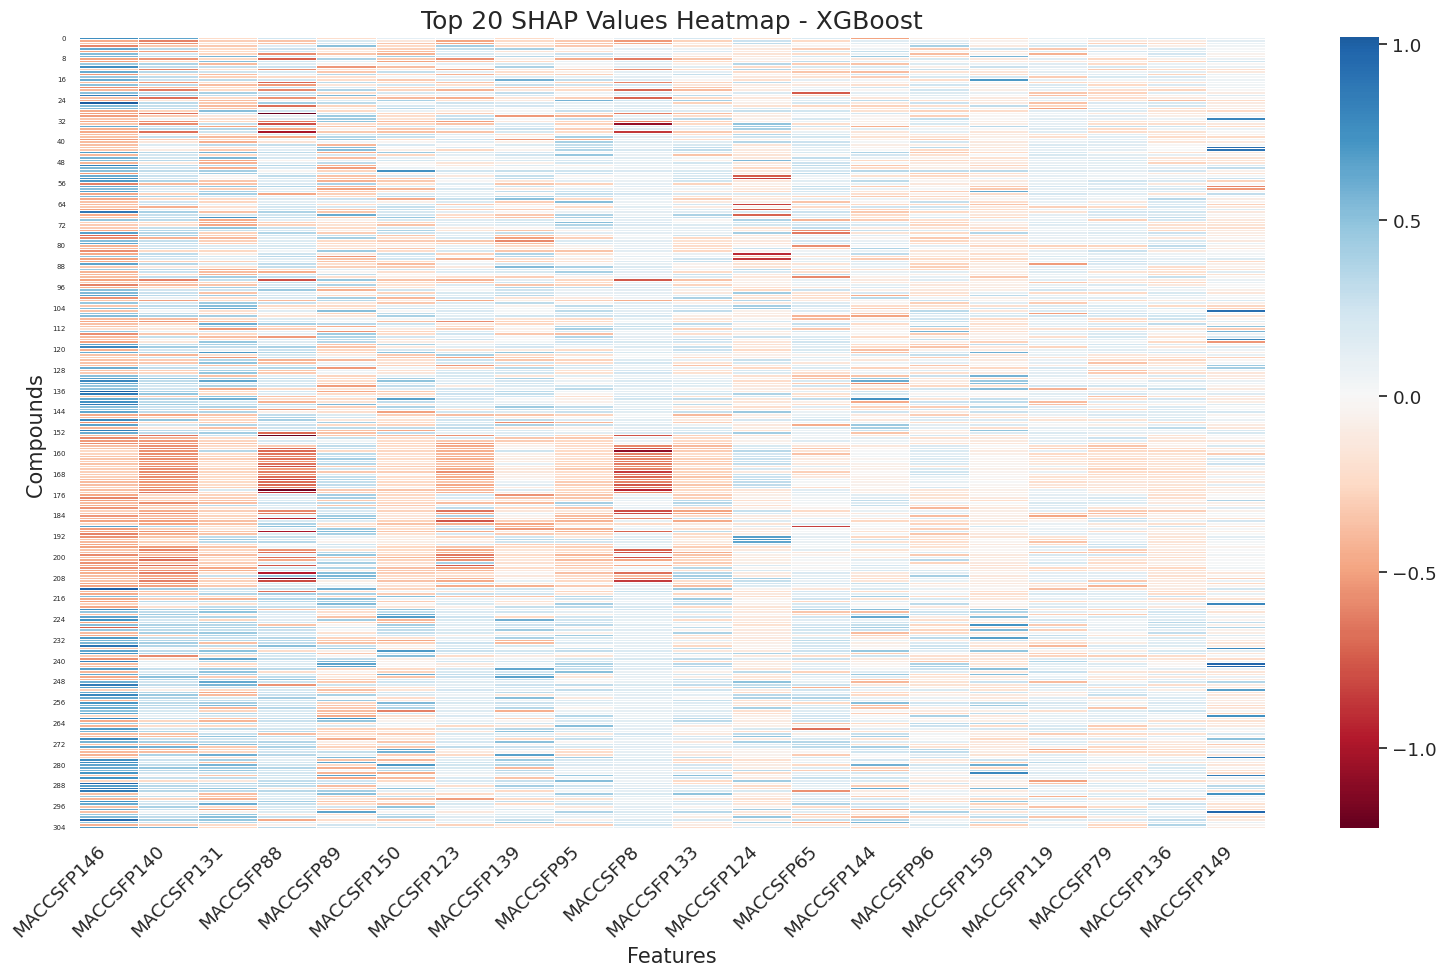

In [ ]:
# Convert SHAP values to a DataFrame (rows for examples, columns for features)
shap_df = pd.DataFrame(shap_values.values, columns=X_val.columns)

# Calculate feature importance based on mean absolute SHAP values
feature_importance = shap_df.abs().mean(axis=0).sort_values(ascending=False)

# Select top features (top 20 in this case)
n_top_features = 20
top_features = feature_importance.index[:n_top_features]

# Filter SHAP DataFrame to include only top features
shap_df_top = shap_df[top_features]
# Set up the figure and axis
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.2)

# Plot heatmap
sns.heatmap(shap_df_top, cmap='RdBu', center=0, annot=False, linewidths=.5)

# Customize labels and title
plt.title(f'Top {n_top_features} SHAP Values Heatmap - XGBoost', fontsize=18)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Compounds ', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=5)
plt.tight_layout()

# Save and display the heatmap
plt.savefig('shap_heatmap_top_features.png')
plt.show()


In [ ]:
# Calculate feature importance based on mean absolute SHAP values
feature_importance = shap_df.abs().mean(axis=0).sort_values(ascending=False)

# Select top features (top 20 in this case)
n_top_features = 20
top_features = feature_importance.index[:n_top_features]

# Display the list of top features
print("Top 20 Features:")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}")


Top 20 Features:
1. MACCSFP146
2. MACCSFP140
3. MACCSFP131
4. MACCSFP88
5. MACCSFP89
6. MACCSFP150
7. MACCSFP123
8. MACCSFP139
9. MACCSFP95
10. MACCSFP8
11. MACCSFP133
12. MACCSFP124
13. MACCSFP65
14. MACCSFP144
15. MACCSFP96
16. MACCSFP159
17. MACCSFP119
18. MACCSFP79
19. MACCSFP136
20. MACCSFP149


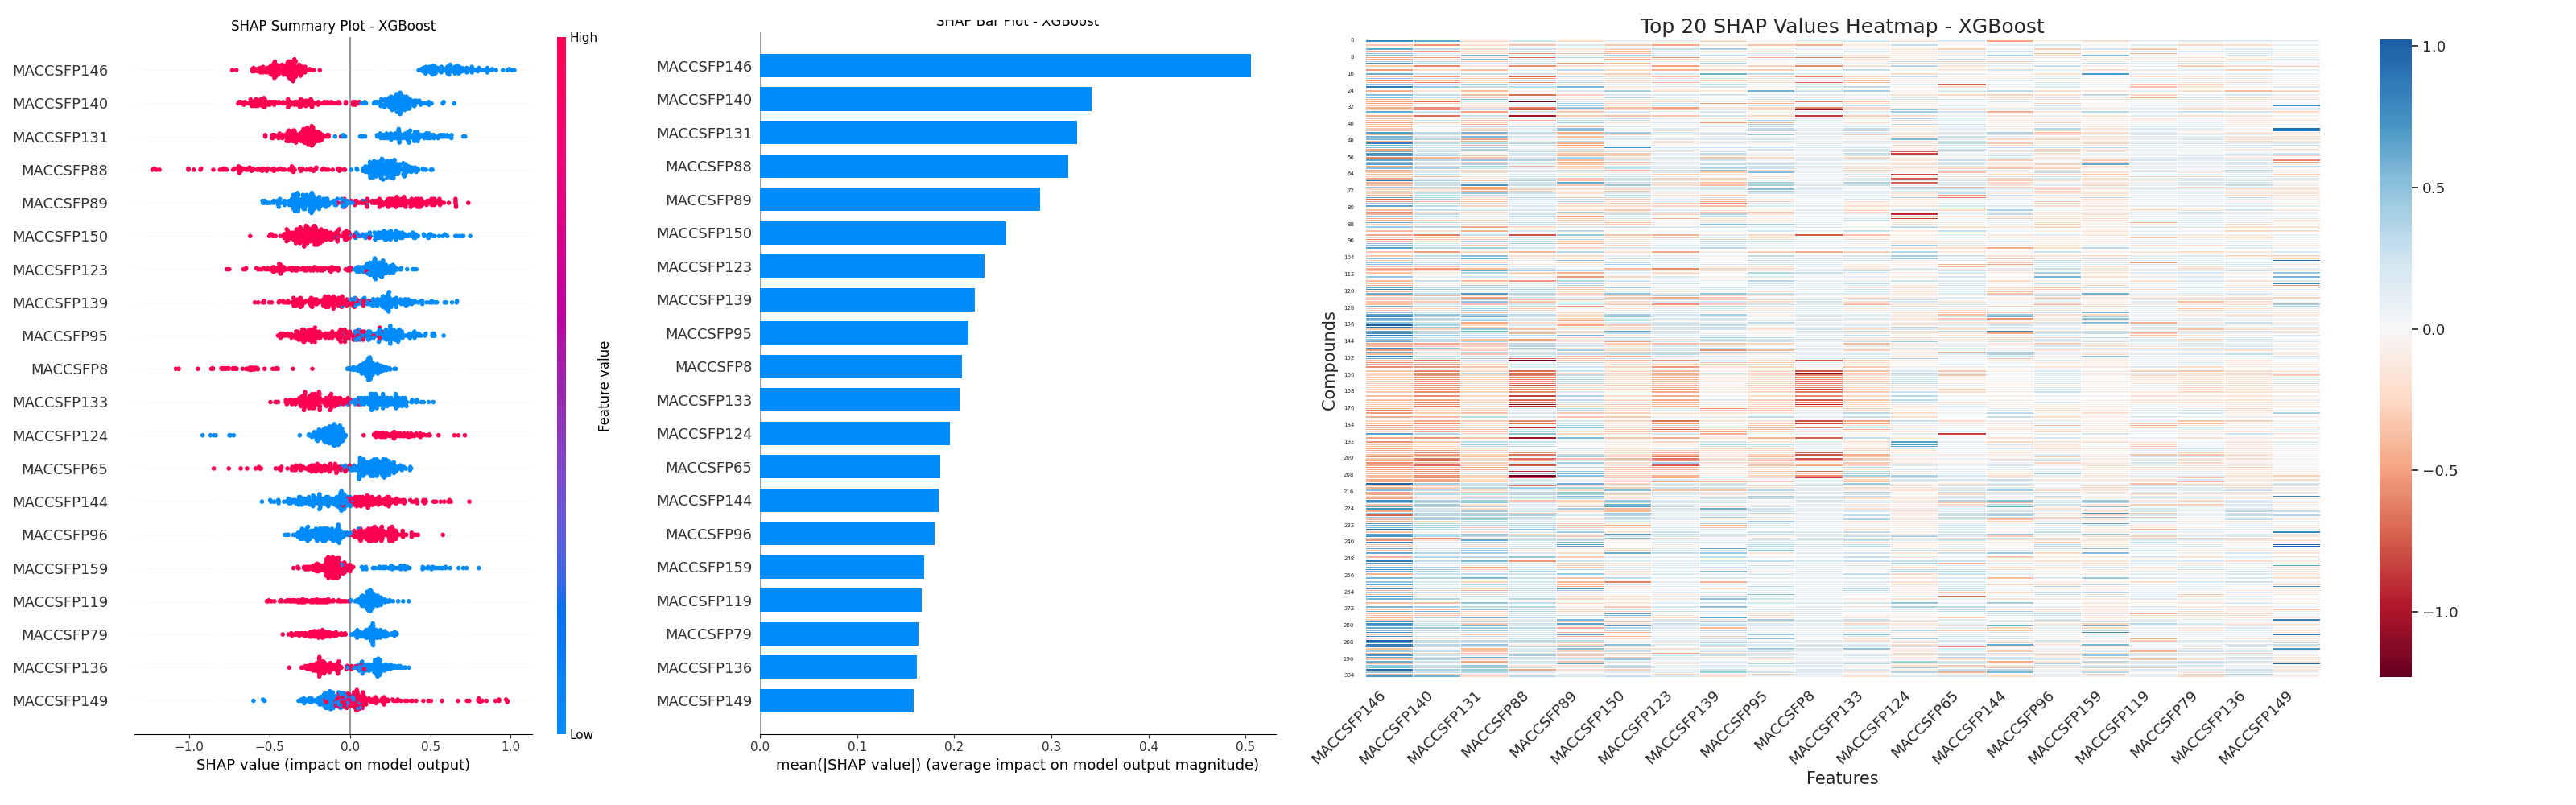

In [ ]:
combined_image

In [ ]:
from PIL import Image

# Load the images
summary_plot_path = 'shap_summary_plot.png'
bar_plot_path = 'shap_bar_plot.png'

summary_plot = Image.open(summary_plot_path)
bar_plot = Image.open(bar_plot_path)

# Determine the width and height of the combined image
width = summary_plot.width + bar_plot.width
height = max(summary_plot.height, bar_plot.height)

# Create a new image with the combined size
combined_image = Image.new('RGB', (width, height))

# Paste the images into the combined image
combined_image.paste(summary_plot, (0, 0))
combined_image.paste(bar_plot, (summary_plot.width, 0))

# Save the combined image
combined_image_path = 'shap_combined_plot_horizontal.png'
combined_image.save(combined_image_path)

# Show the combined image
combined_image.show()


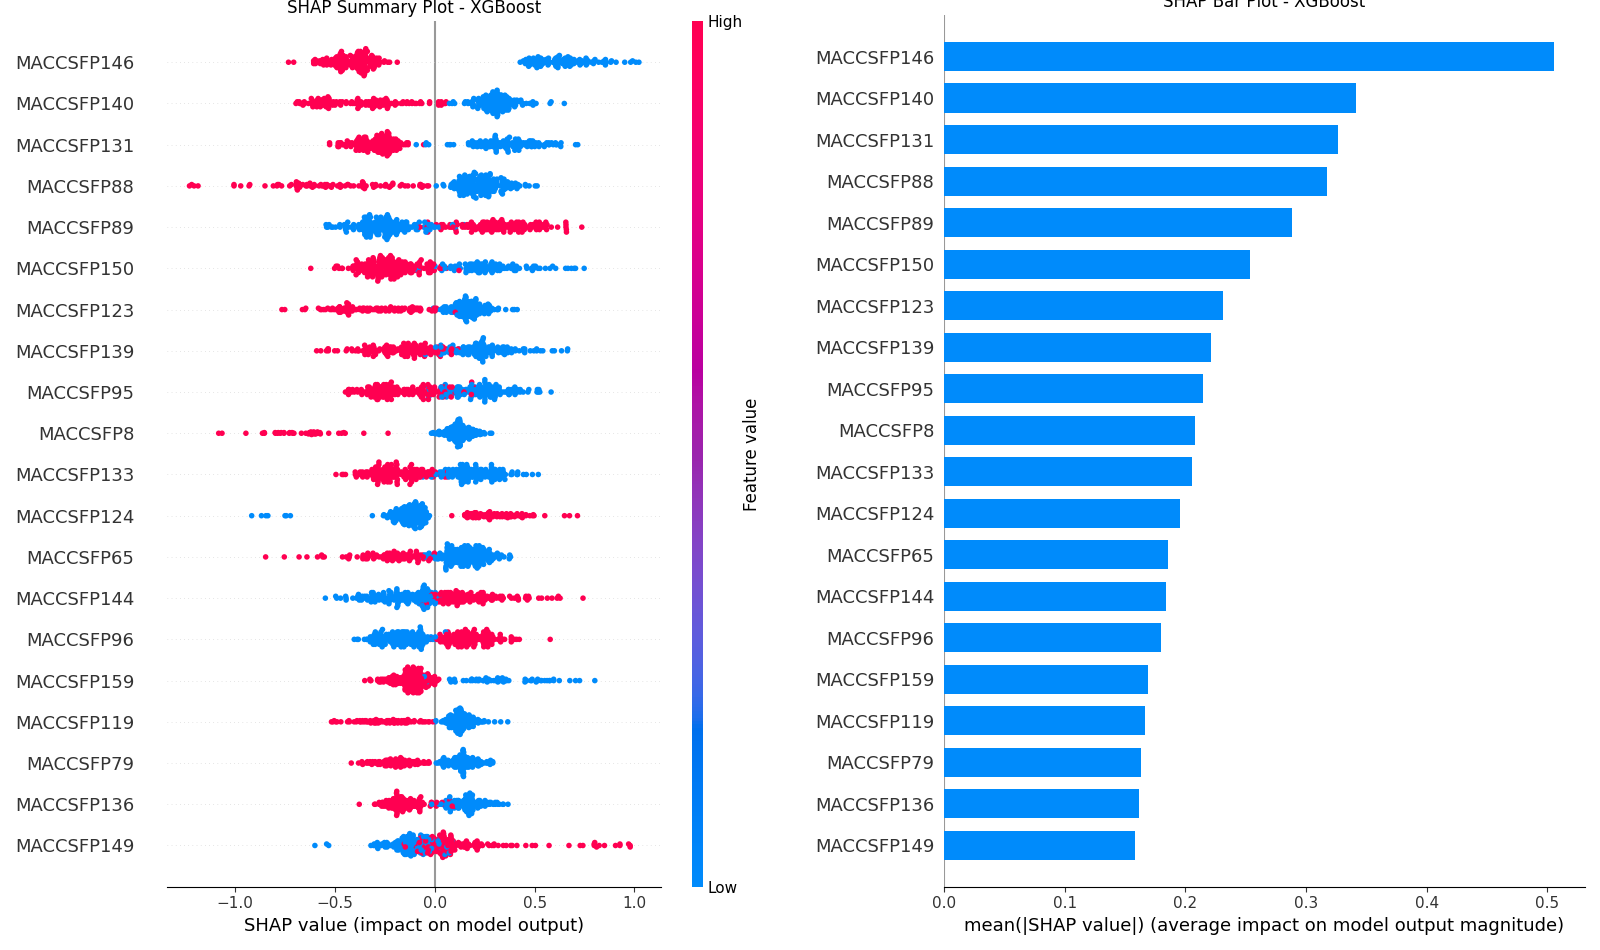

In [ ]:
combined_image